---
# 🌎Brazilian E-Commerce Public Dataset by ⭕list
---

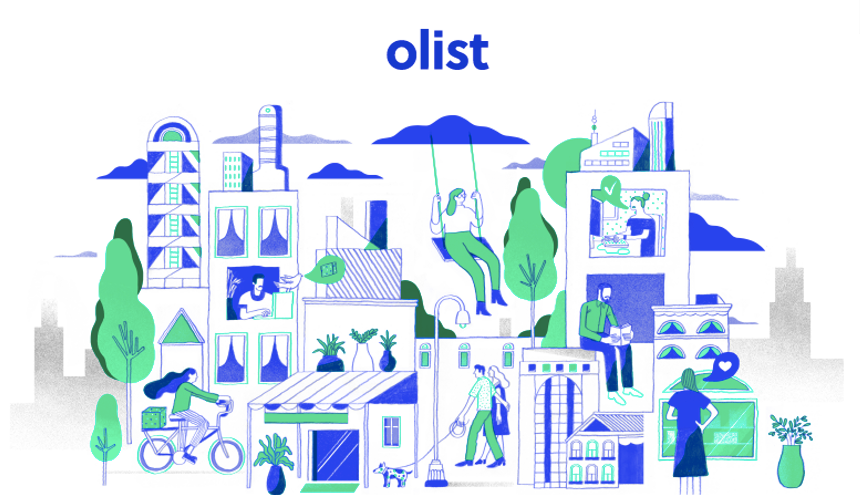


| Import Libraries
---

In [ ]:
# Import the necessary modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt 
import os

| Importing Data
---

In [ ]:
# Create a Function To access the datasets Easily

def read_data(data_name = 'Unknown'):

    '''Could you just put any word from the path of your data 
       and also could you see all the paths of the data 
       by give the fuction what you want data or dirctions
    '''

    dfORdir = input('Do you wanna show the dirctions or data: ').strip().lower() # Enter Yes or No if you wanna see the dirctions

    for path in os.listdir(path= 'Data'): #Iterate on all paths

        if dfORdir in ['dirctions' , 'dir' , 'paths'] :

            print(path)             

        elif  dfORdir in ['data' ,'datasets' , 'df' , 'd']:
             
             if str(data_name) in path : # Extract the path

                return pd.read_csv(f'Data/{str(path)}')

|Understanding Data
---

In [ ]:
#Dircations
read_data()

- Customers
  - This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location

In [ ]:
# Let's start with customer table 
# What's going on 
customer = read_data('customer')
customer.head()

In [ ]:
# Create a function to describe any type of data
def over_view(table):
    # table = table.convert_dtypes()
    table_cat = table.select_dtypes(exclude='number')    # Select all the data types except numeric data 
    table_num = table.select_dtypes(include='number') # Select only all numerical data
    
    # Create an input for choosing to describe categorical or numerical data
    data_type = input('Do you wanna descripe Categorical Data or Numerical Data or both just press (C , N , b):').strip().lower()
          
    def cat():
            # Categorical Data
            cat_desc = table_cat.describe().T.reset_index() # Create Descripe Data
            cat_desc['null values'] = table_cat.isna().sum().values # Number of null values
            cat_desc['dtype'] = table_cat.dtypes.values # Type of data
            cat_desc.top = np.where(cat_desc['count'] == cat_desc['unique'] , 'unique' , cat_desc['top']) # For the top column replace it unique column because number of entries equals the number of unique
            cat_desc = cat_desc.rename(columns={'index':'column','count':'entries','unique':'count distinct','top':'most_freq','freq':'num freq'}) # Rename the columns to avoid any error when  joining  with numerical data
            return cat_desc
    
    def num():
            # Numerical Data
            num_desc = table_num.describe().T.reset_index().round(2) # Create Descripe Data for numerical values
            num_desc['null values'] = table_num.isna().sum().values # Number of null values 
            num_desc['dtype'] = table_num.dtypes.values # Type of data 
            num_desc = num_desc.rename(columns={'index':'column','count':'entries'}) # Rename the columns 
            return num_desc
    
    if data_type == 'c':
            
        return cat()

    
    elif data_type == 'n':

        return num()
    
    elif data_type == 'b' or data_type == 'both':

        # Joining Categorical Data with Numerical Data    
        describe_data = pd.concat([cat() , num()] , axis=0 )
        return describe_data
    
    else:

        return 'please enter (C for Categorical Data or Numerical Data)'   


In [ ]:
# Using the function we already created to know an overview of data
over_view(customer)

In [ ]:
# Select top 10 cities have customers
top_customer = customer.groupby('customer_city',as_index=False)['customer_unique_id'].size().nlargest(10,'size').rename(columns={'size':'Total Customer'})
top_customer

In [ ]:
# Create a % total customer column
top_customer['% total customer'] = round(top_customer['Total Customer'] / len(customer) * 100 , 2)
top_customer

In [ ]:
# Create a % cumulative total customer column
top_customer[r'% cumulative total customer'] = top_customer['% total customer'].rolling(window=len(top_customer), min_periods=1).sum()
top_customer

In [ ]:
# Customers who ordered more than one time and percentage
(customer.customer_unique_id.value_counts() == 1).count() , round((customer.customer_unique_id.value_counts() == 1).count() / len(customer) * 100,2)

In [ ]:
# Customers who ordered more than one time
len(customer) - (customer.customer_unique_id.value_counts() == 1).count() , round((len(customer) - (customer.customer_unique_id.value_counts() == 1).count()) / len(customer) * 100,2)

---

- Geolocation
   - This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

In [ ]:
geolocation = read_data('geolocation')
geolocation.head()

In [ ]:
geo_feq = pd.DataFrame(geolocation.geolocation_city.value_counts().nlargest(10)).reset_index().rename(columns={'index':'geolocation_city','geolocation_city':'most freq'})
geo_feq.style.hide()

In [ ]:
# Using the function we already created to know an overview of data
over_view(geolocation)


---

- Seller    
    - This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

In [ ]:
seller = read_data('seller')
seller.head()

In [ ]:
# Using the function we already created to know an overview of data
over_view(seller)

In [ ]:
# Select top 10 cities have seller
top_seller = pd.DataFrame(seller.seller_city.value_counts().nlargest(10)).reset_index().rename(columns={'index':'seller_city','seller_city':'Total seller'})
top_seller

---

- Order Items
    - This dataset includes data about the items purchased within each order.

In [ ]:
order_items = read_data('order_items')
order_items.head()

In [ ]:
# Using the function we already created to know an overview of data
over_view(order_items)

In [ ]:
order_item = pd.DataFrame(order_items.order_item_id.value_counts()).reset_index().rename(columns={'index':'order_item_id','order_item_id':'most freq'})
order_item

In [ ]:
# Number of buys one item
order_item[order_item.order_item_id == 1]['most freq'][0] , round(order_item[order_item.order_item_id == 1]['most freq'][0] / order_item['most freq'].sum() * 100)

In [ ]:
# Number of buys more than one item
order_item[order_item.order_item_id != 1]['most freq'].sum() , round(order_item[order_item.order_item_id != 1]['most freq'].sum() / order_item['most freq'].sum() * 100)

---

- Orders
    - This is the core dataset. From each order you might find all other information.

In [ ]:
orders = read_data('orders')
orders.head()

In [ ]:
# Convert data to datetime
for col in orders.columns[3:]:
    orders[col] = pd.to_datetime(orders[col])

In [ ]:
# Using the function we already created to know an overview of data
over_view(orders)

In [ ]:
# Most freq order status
orders_status = pd.DataFrame(orders.order_status.value_counts()).reset_index()
orders_status.columns = ['order_status' , 'most freq']
orders_status


---

- Products
   - This dataset includes data about the products sold by Olist.

In [ ]:
products = read_data('products')
products.head()

In [ ]:
# Using the function we already created to know an overview of data
over_view(products)

In [ ]:
# The highest 10 products ordered
top_products = pd.DataFrame(products.product_category_name.value_counts().nlargest(10)).reset_index().rename(columns={'index':'product_category_name','product_category_name':'total orders'})
top_products

In [ ]:
# Create a % total product column
top_products['% total orders'] = round(top_products['total orders'] / products.product_category_name.value_counts().sum() * 100,2)

In [ ]:
# Create a cumulative % total product column
top_products[r'% cumulative total orders'] = top_products['% total orders'].rolling(window=len(top_products) , min_periods=1).sum()
top_products

---

- Payments   
   - This dataset includes data about the orders payment options.

In [ ]:
payments = read_data('payments') 
payments.head()

In [ ]:
# Using the function we already created to know an overview of data
over_view(payments)

In [ ]:
# Total transaction by payment type
total_payment = pd.DataFrame(payments.payment_type.value_counts()).reset_index().rename(columns={'index':'payment_type','payment_type':'total transaction'})
total_payment

---

- reviews
   - This dataset includes data about the reviews made by the customers

In [ ]:
reviews = read_data('reviews')
reviews.head()

In [ ]:
# Convert data to datetime
for col in reviews.columns[-2:]:
    reviews[col] = pd.to_datetime(reviews[col])

In [ ]:
# Using the function we already created to know an overview of data
over_view(reviews)

---

| Exploratory Data Analysis (EDA)
---

 - ##### Merging Datasets

In [ ]:
orders = read_data('orders')
customer = read_data('customer')
order_items = read_data('order_items')
products = read_data('products')
payments = read_data('payments')
seller = read_data('seller')
reviews = read_data('reviews')
geolocation = read_data('geolocation')

In [ ]:
# Merging all orders tables with the other tables depends on the primary key and the foreign key for each table 
olist = orders.merge(order_items , on='order_id' , how='left')\
                               .merge(customer , on='customer_id' , how='outer')\
                                .merge(payments , on='order_id', how='left')\
                                  .merge(products , on='product_id' , how='right')\
                                    .merge(seller , on='seller_id' , how='right')\
                                      .merge(reviews , on='order_id' , how='left')\


olist.head()         

In [ ]:
# Merging the geolocation table with the seller and customer table alone to avoid lagging and it will be a lot of records as well
geolocation_olist = geolocation.merge(seller , left_on='geolocation_zip_code_prefix' , right_on='seller_zip_code_prefix' , how='right')\
             .merge(customer , left_on='geolocation_zip_code_prefix' , right_on='customer_zip_code_prefix' , how='right')

geolocation_olist.head()

In [ ]:
# If you want to know anything about any column often you will find it in this table
over_view(olist)

In [ ]:
# Numerical data
over_view(olist)

- #### Numerical - Univariate 

In [ ]:
# Create a histogram for each column
for i in olist.select_dtypes('number').columns : 
    fig = px.histogram(olist , x= i , marginal='box', color_discrete_sequence=['gray'], height = 600 , width = 1000,barmode = 'overlay' , title = f'Distribution of {i}')
    fig.update_layout( xaxis=dict(showgrid=False),yaxis=dict(showgrid=False),plot_bgcolor='white',title_font_family='Overpass',title_font_size=25,title_xref='paper')
    fig.show()

- #### Numerical - bivariate 

In [ ]:
sns.pairplot(olist.select_dtypes('number'))

In [ ]:
# Price with each column
for i in olist.select_dtypes('number'):
    sns.jointplot(data=olist, x="price", y=i,kind='reg')

- #### Categorical - univariate 

In [ ]:
# Categorical data
over_view(olist)

In [ ]:
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs , subplot_titles=['Order Status' ,'Payment Type' ,'Customer State' ,'Seller State' ])

fig.add_trace(go.Pie(labels=olist.order_status.value_counts().index, values=olist.order_status.value_counts().to_list(), name='Order Status',
                        marker_colors=px.colors.cyclical.Edge),1,1)

fig.add_trace(go.Pie(labels=olist.payment_type.value_counts().index, values=olist.payment_type.value_counts().to_list(), name='Payment Type',
                        marker_colors=px.colors.cyclical.Twilight),1,2)

fig.add_trace(go.Pie(labels=olist.customer_state.value_counts().index, values=olist.customer_state.value_counts().to_list(), name='Customer State',
                        marker_colors=px.colors.cyclical.IceFire),2,1)

fig.add_trace(go.Pie(labels=olist.seller_state.value_counts().index, values=olist.seller_state.value_counts().to_list(), name='Seller State',
                        marker_colors=px.colors.cyclical.Phase),2,2)

fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.update_layout(title_text='By Total Transaction' ,title_x=0.5,title_font_family='Balto' ,title_font_size = 25 , showlegend=False,height = 900 , width=1750 ,template='none')
fig = go.Figure(fig)
fig.write_html('htmlfiles/plotly1.html')
fig

In [ ]:
from wordcloud import WordCloud, STOPWORDS
olist.review_comment_title = olist.review_comment_title.astype('string').dropna()
olist.review_comment_title = olist.review_comment_title.replace(np.NaN,'unspecified')

wordcloud = WordCloud(
               background_color='black' ,
               stopwords=set(STOPWORDS) ,
               height= 750,
               random_state=42,
               width=1750,
               colormap='Reds'
               ).generate(' '.join(olist.loc[olist.review_comment_title != 'unspecified','review_comment_title']))  

plt.subplots(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent Review Comment Title')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
olist.review_comment_message = olist.review_comment_message.astype('string').dropna()
olist.review_comment_message = olist.review_comment_message.replace(np.NaN,'unspecified')

wordcloud = WordCloud(
               background_color='white' ,
               stopwords=set(STOPWORDS) ,
               height= 750,
               random_state=42,
               width=1750,
               colormap='viridis'
               ).generate(' '.join(olist.loc[olist.review_comment_message != 'unspecified','review_comment_message']))  

plt.subplots(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent Review Comment Message')
plt.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1 , cols=2 , specs=[[{"type": "polar"}, {"type": "polar"}]] , subplot_titles=['Top 10 Customer City' , 'Top 10 Seller City'])

fig.add_trace(go.Barpolar(r= olist.customer_city.value_counts().nlargest(10).tolist(),theta=olist.customer_city.value_counts().nlargest(10).index ,marker_color=px.colors.sequential.matter  ,name='Customer City',hoverinfo='r+theta' ),
              row=1, col=1)
fig.add_trace(go.Barpolar(r= olist.seller_city.value_counts().nlargest(10).tolist(), theta=olist.seller_city.value_counts().nlargest(10).index ,marker_color=px.colors.sequential.deep ,name='Seller City' ,hoverinfo='r+theta' ),
              row=1, col=2)
fig = go.Figure(fig)

fig.update_layout(title_text='By Total Transaction' ,title_x=0.5,title_font_family='Arial' ,title_font_size = 25 , height=900,template="plotly_dark" ,showlegend=False)
fig.write_html('htmlfiles/plotly2.html')
fig

- #### Categorical - bivariate 

In [ ]:
top_custmer_city_price = olist.groupby('customer_city').agg(Total_Orders =('order_id','nunique') , Total_Price = ('price','sum')).nlargest(10,columns=['Total_Orders']).reset_index()
top_custmer_city_price

In [ ]:
top_seller_city_price = olist.groupby('seller_city').agg(Total_Orders =('order_id','nunique') , Total_Price = ('price','sum')).nlargest(10,columns=['Total_Orders']).reset_index()
top_seller_city_price

In [ ]:
# Create subplots, using 'domain' type for pie charts
specs=[[{"secondary_y": True}], [{"secondary_y": True}]]

fig = make_subplots(rows=2 , cols=1 ,specs=specs , subplot_titles=['Customer City' , 'Seller City'])

fig.add_trace(go.Bar(x = top_custmer_city_price['customer_city'] ,
                     y= top_custmer_city_price['Total_Price'] ,
                     name='Total_Price' , 
                     marker_color = 'violet' ,
                     text=top_custmer_city_price['Total_Price'] ,
                     textposition='outside',
                     hoverinfo='y')
                     ,1,1,secondary_y=False)

fig.add_trace(go.Scatter(x = top_custmer_city_price['customer_city'] , y= top_custmer_city_price['Total_Orders'], marker_color = 'whitesmoke' ,name='Total_Orders',hoverinfo =  'y'),1,1,secondary_y=True)

fig.add_trace(go.Bar(x = top_seller_city_price['seller_city'] , 
                     y= top_seller_city_price['Total_Price'] , 
                     name='Total_Price',
                     marker_color = 'turquoise' ,
                     text=top_seller_city_price['Total_Price'] ,
                     textposition='outside',
                     hoverinfo='y')
                     ,2,1,secondary_y=False)

fig.add_trace(go.Scatter(x = top_seller_city_price['seller_city'] , y= top_seller_city_price['Total_Orders'] , marker_color = 'snow' , name='Total_Orders' , hoverinfo= 'y'),2,1,secondary_y=True)

fig.update_traces(texttemplate = '%{text:.2s}')

fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  title_text='The highest 10 cities that achieve total orders and total price' ,
                  title_x=0.5,
                  title_font_family='Raleway' ,
                  title_font_size = 25 , 
                  height=1000 ,
                  showlegend = False,
                  template = 'plotly_dark')


fig = go.Figure(fig)
fig.write_html('htmlfiles/plotly3.html')
fig

In [ ]:
# Create top 10 products
Top_10_products = olist.groupby('product_category_name')['price'].sum().nlargest(10).reset_index()
Top_10_products['% Total Price'] = round((Top_10_products.price / olist.price.sum()) * 100 , 2)
Top_10_products['% Total cumulative Price']  = Top_10_products['% Total Price'].rolling(window=len(Top_10_products) , min_periods=1).sum()
Top_10_products

In [ ]:
# Create Less 10 products
Less_10_products = olist.groupby('product_category_name')['price'].sum().nsmallest(10).reset_index().sort_values(by = 'price' ,ascending=False)
Less_10_products['% Total Price'] = round((Less_10_products.price / olist.price.sum()) * 100 , 2)
Less_10_products['% Total cumulative Price']  = Less_10_products['% Total Price'].rolling(window=len(Less_10_products) , min_periods=1).sum()
Less_10_products

In [ ]:
# The highest and lowest 10 Products selling account for 1.3% of total products
round(10 / olist.product_category_name.nunique() * 10 ,2)

In [ ]:
# Create subplots, using 'domain' type for pie charts
specs=[[{"secondary_y": True}], [{"secondary_y": True}]]

fig = make_subplots(rows=2 , cols=1 ,specs=specs , subplot_titles=[r'Highest 10 Products who are accounting for 64% of the Total price' , r'Lowest 10 Products who are accounting for 0.1% of the Total price'])

fig.add_trace(go.Bar(x = Top_10_products['product_category_name'] ,
                     y= Top_10_products['price'] ,
                     name='Total Price' , 
                     marker_color = px.colors.sequential.Purples ,
                     text=Top_10_products['price'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}' ,
                     hoverinfo='y')
                     ,1,1,secondary_y=False)

fig.add_trace(go.Scatter(x = Top_10_products['product_category_name'] , y= Top_10_products['% Total cumulative Price'], marker_color = 'black' ,name='Cumulative Total Price',hoverinfo =  'y'),1,1,secondary_y=True)
fig.add_trace(go.Scatter(x = Top_10_products['product_category_name'] , y= Top_10_products['% Total Price'] ,marker_color = 'gray' ,name='Cumulative Total Price',hoverinfo =  'y'),1,1,secondary_y=True)

fig.add_trace(go.Bar(x = Less_10_products['product_category_name'] , 
                     y= Less_10_products['price'] , 
                     name='Total Price',
                     marker_color = px.colors.sequential.Blues ,
                     text=Less_10_products['price'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}',
                     hoverinfo='y')
                     ,2,1,secondary_y=False)

fig.add_trace(go.Scatter(x = Less_10_products['product_category_name'] , y= Less_10_products['% Total cumulative Price'] , marker_color = 'black' , name='Cumulative Total Price' , hoverinfo= 'y'),2,1,secondary_y=True)
fig.add_trace(go.Scatter(x = Less_10_products['product_category_name'] , y= Less_10_products['% Total Price'] , marker_color = 'gray' , name='Cumulative Total Price' , hoverinfo= 'y'),2,1,secondary_y=True)



fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  legend_orientation='v',
                  plot_bgcolor = 'white',
                  title_text=f'The highest and lowest 10 Products selling account for {round(10 / olist.product_category_name.nunique() * 10 ,2)}% of total products' ,
                  title_x=0.5,
                  title_font_family='Old Standard TT' ,
                  title_font_size = 30 , 
                  height=1200 ,
                  showlegend = False
)


fig = go.Figure(fig)
fig.write_html('htmlfiles/plotly4.html')
fig

In [ ]:
olist.groupby('payment_type').agg(Total_price = ('price','sum') , Total_orders = ('order_id','nunique')).reset_index()

In [ ]:
fig = px.bar(olist.groupby('payment_type').agg(Total_price = ('price','sum') , Total_orders = ('order_id','nunique')).reset_index().sort_values(by='Total_price',ascending=False) , 
       y = 'payment_type' ,
       x = 'Total_price',
       height=750,
       text='Total_price',
       labels=dict(payment_type = ' ' , Total_price = 'Total Price' , Total_orders='Total Orders'),
       color='Total_orders' , 
       title='Most Common Payment Type.',
       base='Total_orders',
       color_continuous_scale=px.colors.sequential.dense , 
       pattern_shape='payment_type',
       hover_name='Total_orders')
fig.update_traces(texttemplate='%{text:.3s}',textposition = 'outside')
fig.update_layout(plot_bgcolor = 'white',showlegend = False)
fig.write_html('htmlfiles/plotly5.html')
fig

- #### HeatMaps

In [ ]:
# Create a heatmap to see the correlation for each column with each other
fig = px.imshow(round(olist.corr() ,2),  color_continuous_scale='RdBu_r' ,height=1250,width=1800  ,text_auto=True ,template='none' ,zmax=1,zmin = -1 , title='Correlations')
fig.update_layout(xaxis_tickangle = 45)

---

|ASK
---

- __01 -__  __How many orders for each date and what is the growth of it?__

- __02 -__  __what is the total cumulative of orders and rolling average of orders?__

- __03 -__  __What is the distribution of total orders over time?__

- __04 -__  __What are the most day and months that have total orders?__

- __05 -__  __Which part of the day has the highest amount of total orders?__

- __06 -__  __When was the booming period of total orders?__

- __07 -__  __What is the average order per minute, second, hour, day, year, and month?__

- __08 -__  __Are the holidays days affect the number of orders and what is the peak point?__

- __09 -__  __How many orders of each city and state and which are the highest ones?__

- __10 -__ __What are the Average orders per customer along the time?__

- __11 -__ __What are the highest and lowest products by total orders?__

- __12 -__ __How many orders were reviewed and they don't review?__

- __13 -__ __What are the customer lifetime value and average order value for each customer?__

- __14 -__ __What is the churn rate of customers quarterly and monthly?__

- __15 -__ __How much does the customer take time to repurchase?__

- __16 -__ __What is the last purchase process by days for each customer and what's the total average?__

- __17 -__ __Who are the active and inactive customers?__

- __18 -__ __What is the distribution of total customers over time?__

- __19 -__ __What is the total orders and the total customer month over month?__

- __20 -__ __What is the average customer per minute, hour, day, and month?__

- __21 -__ __Which part of the day has the highest amount of total customers?__

- __22 -__ __When were the blooming periods of the customers?__

- __24 -__ __Is there a particular product that buying from customers?__

- __25 -__ __What is the total customers by month and day?__

- __26 -__ __What are the most profitable cities and state?__

- __27 -__ __What is the total revenue per customer and orders?__

- __28 -__ __Where were the peak trends of total revenue?__

- __29 -__ __what are the total cumulative revenue and rolling average of revenue?__

- __30 -__ __Who are the highest 10 and lowest 10 seller that achieves the most elevated amount sold by order items?__

- __31 -__ __Who is the highest seller whose orders have reviews?__

- __32 -__ __What is the average purchase approval time and does it affects repurchase or order status, what is the most frequent time?__

- __33 -__ __What is the average purchase carrier delivery time and does it affects repurchase or order status, what is the most frequent time?__

- __34 -__ __Does the delivery time impact repurchase or reviews?__

- __35 -__ __What is the average delivery time for each order and the most frequent time?__

- __36 -__ __Are the orders reaching at the estimated time and what is the most frequent time?__

- __37 -__ __Does the review answering time influence delivery time and what is the average and most frequent time?__

- __38 -__ __Does the shipping limit time delivered influence delivery time and what is the average and most frequent time?__

- __39 -__ __What are the price quantiles for each city and state?__

- __40 -__ __What is the total payment value for each payment type and payment sequential?__

- __41 -__ __How many products do quarterly, monthly, daily, and hourly by total amount sold?__

- __42 -__ __Does the product's name length, description, photos, length, height, and weight impact the product purchase?__

- __43 -__ __Analysis of the worst score reviews and figure out why?__

- __44 -__ __What are the highest installments by the payment value and total transactions?__

- __45 -__ __Are there people taking installments at a particular time?__

- __46 -__ __How many customers don't make a review and why?__

- __47 -__ __What is the highest review's title and comments?__

- __48 -__ __What are the quarterly, monthly, daily, and hourly for freight value?__

- __49 -__ __What are the minute and seconds for total revenue and total transactions?__

- __50 -__ __How many target customer from all popualtion and what's the percentage?__

---

| Preprocessing and Cleaning  
---

- __Dealing With Missing Values__ 

In [ ]:
# calculate % missing value for each column
pd.concat([olist.isna().sum().sort_values(ascending=False) , round((olist.isna().sum().sort_values(ascending=False) / len(olist)) * 100,2)] , axis=1 , keys=['num_missing' ,'ratio_missing'])

In [ ]:
# Showing the missing values of each column
import missingno as msno
msno.matrix(olist)

In [ ]:
# Replace Nan values by unspecified
olist.fillna({'product_category_name':'unspecified','payment_type' :'unspecified'},inplace=True)
# Impute null values by the most frequent values because to convert them to the data type that we want
for col in ['payment_sequential','payment_installments','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_score']:
    olist[col] = olist[col].fillna(olist[col].mode()[0])

- __Dealing With Duplicate Values__ 

In [ ]:
# Calculate duplicate values for each column
def duplicate(data) :   
    duplicated_values = {}
    for col in data.columns:
        num = data.duplicated(subset=[col]).sum()
        ratio = round(num / len(data) * 100 ,2)
        duplicated_values.update({col: {'number_of_duplicated': num , 'ratio_duplicate':ratio}})
    return pd.DataFrame({'columns':duplicated_values.keys() , 
                         'number_of_duplicated': [i['number_of_duplicated'] for  i in duplicated_values.values()] , 
                         'ratio_duplicate': [i['ratio_duplicate'] for  i in duplicated_values.values()]}).sort_values(by='number_of_duplicated' , ascending=False)

duplicate(olist)

In [ ]:
# I make sure that all duplicate values are norma
olist[olist.review_comment_message.duplicated()][['review_comment_message']].sort_values(by='review_comment_message', ascending=False).head(30)

In [ ]:
# there are 9 reviews with an empty message in it 
olist.loc[olist.review_comment_message == ' ','review_comment_message']

In [ ]:
# Make sure that all rows does not the same
olist[olist.order_purchase_timestamp.duplicated()].sort_values(by='order_purchase_timestamp', ascending=False).head(30)
# Everything is normal it's just a coincidence

- __Handling Data Types__

In [ ]:
# Showing data type for each column
pd.DataFrame(olist.dtypes,columns=['dtype'])

In [ ]:
olist.dtypes.value_counts().plot.pie()

In [ ]:
# Convert Float data type to intgers
for col in ['order_item_id','payment_sequential','payment_installments','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_score'] :
    olist[col] = olist[col].astype('int')

In [ ]:
# Convert DateTime column to date type
for col in ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date','review_creation_date', 'review_answer_timestamp','shipping_limit_date']:
    olist[col] = pd.to_datetime(olist[col])

In [ ]:
# Convert data type to string and leave id columns as object type
for col in olist.select_dtypes(include='object').columns:
    if 'id' in str(col):
        pass
    else:
        olist[col] = olist[col].astype('string')

- __Data Validation__

In [ ]:
# Check the data if there are abnormal values
for valid in olist.columns:
    print(f'{col} : ' )
    print(olist[valid].sample(10).unique())
    print('=' * 20)

- __Detect Outliers__

In [ ]:
# there're alot of outliers here but maybay not bad
for col in olist.select_dtypes('number').columns:

    fig = px.box(olist , x = olist[col])
    
    fig.show()

In [ ]:
# Number of outliers in each columns
def outliers(data):

    #showing or clear
    ask = input('Do you wanna show outliers or clear outliers: ').lower().strip()

    if ask in ['show','s']:
        
        # Create Dataframe to showing number of outliers for each column 
        df = []
        for col in data.select_dtypes('number').columns:
            IQR = data[col].quantile(.75) - data[col].quantile(.25)
            lower = data[col].quantile(.25) - 1.5 * IQR
            upper = data[col].quantile(.75) + 1.5 * IQR
            num = data.loc[(data[col] < lower) | (data[col] > upper),col].count() 
            ratio = round(num / len(olist) * 100 , 2)
            df.append([col , num ,  ratio]) 

        return pd.DataFrame(df , columns=['columns','num_outliers','ratio_outliers']).sort_values(by='ratio_outliers' , ascending=False) 

    elif ask in ['clear','c']:
            
            # Remove all outliers or remove from particular column
            column = input('Do you wanna remove outliers from supcefic column or all: ').lower().strip()

            # Remove all outliers from dataframe
            if column in ['a','all']:
                outlier_list = []  
                for col in data.select_dtypes('number').columns:
                        IQR = data[col].quantile(.75) - data[col].quantile(.25)
                        lower = data[col].quantile(.25) - 1.5 * IQR
                        upper = data[col].quantile(.75) + 1.5 * IQR
                        outliers = data[(data[col] < lower) | (data[col]  > upper)].index.tolist()
                        outlier_list.append(outliers)
                index_outliers = pd.Series([ii  for i in outlier_list for ii in i]).unique().tolist()

                return  olist.drop(index_outliers , axis=0)

                print('All Outliers removed')

            elif column in ['colum','columns','c']:
                    
                    # Remove outliers from particular column
                    column_name = input(f'Put the column name that you wanna remove outliers from it{print(data.columns)}: ').split()
                    column_name = ''.join(column_name)
                    IQR = data[column_name].quantile(.75) - data[column_name].quantile(.25)
                    lower = data[column_name].quantile(.25) - 1.5 * IQR
                    upper = data[column_name].quantile(.75) + 1.5 * IQR
                    return data[(data[column_name] > lower) & (data[column_name] < upper)] 
            
            else:
                 print('Please Choose column or all')        

    else:
         print('Please Choose show or clear')

         
outliers(olist)  

In [ ]:
def select_outliers(data):

    
    # Choose Select all or column
    
    ask = input('Do you wanna select all outliers or particular column: ').strip().lower()
    column_name = input(f'Put the column name that you wanna select{print(data.columns)}: ').split()
    column_name = ''.join(column_name) # Convert from list to string

    try:
        # Select Outliers and print the whole dataset
        if ask in ['all','a']:
            IQR = data[column_name].quantile(.75) - data[column_name].quantile(.25)
            lower = data[column_name].quantile(.25) - 1.5 * IQR
            upper = data[column_name].quantile(.75) + 1.5 * IQR
            return data[(data[column_name] < lower) | (data[column_name] > upper)]
        
        # Select Outliers and print the series of column
        elif ask in ['column','c']:
            IQR = data[column_name].quantile(.75) - data[column_name].quantile(.25)
            lower = data[column_name].quantile(.25) - 1.5 * IQR
            upper = data[column_name].quantile(.75) + 1.5 * IQR
            return data.loc[(data[column_name] < lower) | (data[column_name] > upper), column_name]
        
        else:

            print('Please Enter column or all')
    
    # If you put categorical column let you try again
    except:
        print('Please Enter Numrical Column Try Again ')  
        ask = input('Do you wanna select all outliers or particular column: ').strip().lower()
        column_name = input(f'Put the column name that you wanna select: ').split()
        column_name = ''.join(column_name) # Convert from list to string  
             

select_outliers(olist)

- __Feature Engineering__

In [ ]:
# Extract Quarter & Year from the order purchase column
olist['purchase_q_&_y'] = olist.order_purchase_timestamp.dt.year.astype('string')+" & "+ olist.order_purchase_timestamp.dt.quarter.astype('string') 
olist['purchase_q_&_y'].head()

In [ ]:
# Extract AM & PM from the order purchase column
olist['purchase_time'] = olist.order_purchase_timestamp.dt.strftime('%p')
olist['purchase_time'].head()

In [ ]:
# Create a mapper for hours to be easy in visualization  and understandable 
maper = {0:'12 To 1' , 1:'1 To 2' , 2:'2 To 3' , 3:'3 To 4' ,4:'4 To 5',5:'5 To 6',6:'6 To 7' ,7:'7 To 8' ,8:'8 To 9',9:'9 To 10',10:'10 To 11',11:'11 To 12',
12:'12 To 13',13:'13 To 14' , 14:'14 To 15' , 15:'15 To 16' , 16:'16 To 17' ,17:'17 To 18',18:'18 To 19',20:'20 To 21' ,21:'21 To 22' ,22:'22 To 23',23:'23 To 24'}

olist['purchase_hours'] = olist.order_purchase_timestamp.dt.hour.map(maper)
olist['purchase_hours'].head()

In [ ]:
# Extract first there characters of month & Year from the order purchase column
olist['purchase_m_&_y'] = olist.order_purchase_timestamp.dt.strftime('%b-%Y')
olist['purchase_m_&_y'].head()

In [ ]:
# Extract first there characters of dayname & Year from the order purchase column
olist['purchase_wd_&_y'] = olist.order_purchase_timestamp.dt.strftime('%a-%Y')
olist['purchase_wd_&_y'].head()

In [ ]:
# Extract dayname & monthname from the order purchase column
olist['purchase_D_M'] = olist.order_purchase_timestamp.dt.strftime('%A %B')
olist['purchase_D_M'].head()

In [ ]:
# Extract Weeks of all year 52 week * 7 = 364 day from the order purchase column
olist['purchase_W_Y'] = olist.order_purchase_timestamp.dt.weekofyear
olist['purchase_W_Y'].unique()

In [ ]:
# Last time the customer purchased from us  
olist['last_purchase'] = olist.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')
olist['last_purchase'] = (olist.order_purchase_timestamp.max() - olist.last_purchase ).dt.days
olist['last_purchase'].head()

In [ ]:
# Create a column that contains all day parts
"""
Parts of the Day

Morning     5 am to 12 pm (noon)
Early morning    5 to 8 am
Late morning     11 am to 12pm

Afternoon     12 pm to 5 pm
Early afternoon   1 to 3pm
Late afternoon    4 to 5pm

Evening     5 pm to 9 pm
Early evening   5 to 7 pm
Late evening    9 to 12 pm
Night         9 pm to 4 am
"""
olist['hour'] = olist.order_purchase_timestamp.dt.hour
olist['purchase_day_parts'] = np.select([
           ((olist.hour >= 5) & (olist.hour <= 8)) ,
           ((olist.hour >= 11) & (olist.hour <= 11)) ,
           ((olist.hour >= 5) & (olist.hour <= 11)) ,
           ((olist.hour >= 13) & (olist.hour <= 14)),
           ((olist.hour >= 15) & (olist.hour <= 15)) ,
           ((olist.hour >= 12) & (olist.hour <= 16)) ,
           ((olist.hour >= 17) & (olist.hour <= 20)) ,
           ((olist.hour >= 17) & (olist.hour <= 18)) ,
           ((olist.hour >= 21) & (olist.hour <= 22)) ,
           ((olist.hour >= 21) & (olist.hour <= 23) | (olist.hour >= 0) & (olist.hour <= 4) )] ,

           ['Early morning' ,'Late morning','Morning','Early afternoon','Late afternoon','Afternoon','Evening','Early evening','Late evening','Night'] ,

)
olist['purchase_day_parts'].value_counts()

In [ ]:
# Extract minute & second from the order purchase column
olist['purchase_minute'] = olist.order_purchase_timestamp.dt.minute + 1
olist['purchase_second'] = olist.order_purchase_timestamp.dt.second + 1 

In [ ]:
# Last time the product purchased from us 
olist['last_product_purchase'] = olist.groupby('product_id')['order_purchase_timestamp'].transform('max')
olist['last_product_purchase'] = (olist.order_purchase_timestamp.max() - olist['last_product_purchase']).dt.days
olist['last_product_purchase'].head()

In [ ]:
# Top public holidays in brazil
pd.read_html('https://en.wikipedia.org/wiki/Public_holidays_in_Brazil')[0]

# Secondry holidays
'''
the Brazilian observation of Mother's Day, is celebrated every second Sunday in May
the Brazilian observation of Father's Day, is celebrated every second Sunday in August
the Brazilian equivalent of St. Valentine's Day, is observed on June 12
'''

In [ ]:
# Create a column that contains holidays days and weekend days and working hours
mother_day = olist.loc[olist['purchase_D_M'] == 'Sunday May' ,['purchase_D_M','purchase_W_Y']].sort_values(by='purchase_W_Y')['purchase_W_Y'].min() + 1
father_day = olist.loc[olist['purchase_D_M'] == 'Sunday August' ,['purchase_D_M','purchase_W_Y']].sort_values(by='purchase_W_Y')['purchase_W_Y'].min() + 1

olist['purchase_holidays'] = np.select(

          [(olist.order_purchase_timestamp.dt.strftime('%B %d') == 'January 01') ,
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'April 21') ,
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'April 21'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'September 07'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'October 12'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'November 02'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'November 15'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'December 25'),
           (olist.order_purchase_timestamp.dt.strftime('%B %d') == 'June 12'),
           (olist.hour >= 8) & (olist.hour <= 17) ,
           (olist.order_purchase_timestamp.dt.strftime('%A') == 'Saturday') | (olist.order_purchase_timestamp.dt.strftime('%A') == 'Sunday'),
           (olist['purchase_D_M'] == 'Sunday May') & (olist['purchase_W_Y'] == mother_day),
           (olist['purchase_D_M'] == 'Sunday August') & (olist['purchase_W_Y'] == father_day)],
           
           ['New Year\'s Day' ,
            'Tiradentes\' Day' ,
            'Labour Day',
            'Independence Day',
            'Our Lady of Aparecida',
            'All Soul\'s Day',
            'Republic Proclamation Day',
            'Christmas',
            'Valentine\'s Day',
            'Free Day' ,
            'Working hours' ,
            'Mother\'s Day',
            'Father\'s Day'] , 

            default='Normal Day')

olist['purchase_holidays']

In [ ]:
# Extract time whether by (days, hours, minutes, or seconds) between the moment that the customer purchased and the payment approval
import re

def times(x):


    if x[0] == '0':

        if x[-1][:2] != '00':

            return  re.sub(r'0','', x[-1][:2]) +" "+ "hours" # I used a regular expression to remove the zero from the first character (01) to be (1)
        
        elif x[-1][3:5] != '00' and x[-1][:2] == '00':
                
            return re.sub(r'0','', x[-1][3:5]) +" "+ "minutes"
        
        elif x[-1][-2:] != '00' and x[-1][3:5] == '00' and x[-1][:2] == '00':
            
            return re.sub(r'0','', x[-1][-2:]) +" "+ "seconds"
        
        else:

            return '0'
         
    else:
        return re.sub(r'0','',x[0]) +" "+ "days"
    

olist['purchase_approval_time'] = (olist.order_approved_at - olist.order_purchase_timestamp).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['purchase_approval_time'].head()

In [ ]:
# Extract time whether by days or hours between the moment that the customer purchased and the order delivered carrier to the logistic partner
olist['purchase_carrier_delivery_time'] = (olist.order_delivered_carrier_date - olist.order_purchase_timestamp).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['purchase_carrier_delivery_time'].head()

In [ ]:
# Extract time whether by (days, hours, minutes, or seconds) between the moment that the customer purchase to the actual order delivery to the customer
olist['delivery_time'] = (olist.order_delivered_customer_date - olist.order_purchase_timestamp).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['delivery_time'].head()

In [ ]:
# Extract time whether by (days, hours, minutes, or seconds) between the moment that the actual order delivery to the customer and estimated delivery date that was informed to customer at the purchase moment
olist['estimated_time_delivery'] = (olist.order_estimated_delivery_date - olist.order_delivered_customer_date).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['estimated_time_delivery'].head()

In [ ]:
# Extract time whether by (days, hours, minutes, or seconds) between the moment that the satisfaction survey was sent to the customer and the satisfaction survey answered
olist['review_answering _time'] = (olist.review_answer_timestamp - olist.review_creation_date).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['review_answering _time'].head()

In [ ]:
# Extract time whether by (days, hours, minutes, or seconds) between the moment that the seller shipping limit date for handling the order over to the logistic partner and the order delivered carrier to the logistic partner
olist['shipping_limit_time_delivered'] = (olist.shipping_limit_date - olist.order_delivered_carrier_date).astype('string').fillna(value='unknown').str.split(' ').apply(times)
olist['shipping_limit_time_delivered'].head()

In [ ]:
# Ratio of freight value for price
olist['shipping_ratio'] = round(olist.freight_value / olist.price * 100,1)
olist['shipping_ratio'].head()

In [ ]:
# Calculate total revenue
olist['total_revenue'] = round(olist.order_item_id * olist.price)

In [ ]:
# Divide the price by quantiles
olist['price_quantiles'] = pd.cut(olist.price,  bins= list(olist.price.quantile([0,.25,.5,.75,1])) , labels=['25%','50%','75%','100%']).fillna(value='25%')
olist['price_quantiles'].head()

---

| Analyzing 
---

In [ ]:
# How many orders for each date and what is the growth of it?
Q1 = olist.groupby(olist.order_purchase_timestamp.dt.date)[['order_id']].nunique().reset_index().rename(columns={'order_purchase_timestamp':'Date','order_id':'Total_Order'}).sort_values(by='Date',ascending=True)
Q1

In [ ]:
# Create a function to take the date and column name of the column you want to calculate growth for and it will automatically generate a new table with a column for growth

def Growth(data , column_name):
   
    growth = [] 

    for index , col in data.iterrows():

        try:  

            growth.append(round((data[column_name][index  + 1 ] - col[column_name]) / data[column_name][index  + 1],2)) # (Current - Pervious) / Current
    

        except KeyError: 
                        
            growth.insert(0,0)  # To adjust the length with the original data

    data['Growth'] = growth

    return data

Q1 = Growth(Q1,'Total_Order')


In [ ]:
#Another way to create growth column
Q1.assign(growth = lambda x : round(x['Total_Order'].diff() /  x['Total_Order'],2) )

In [ ]:
fig= px.area(Q1 , 
              x = 'Date', 
              y = 'Total_Order',
              hover_name='Date' , 
              hover_data= ['Date'],
              height=1000 , 

              color_discrete_sequence=['gray'],
              labels=dict(Total_Order = '' , Date = '')
              

)

fig.add_trace(go.Scatter(x = Q1.Date, y=Q1.Growth ,stackgroup='one' , hoverinfo='y+x' , name='Growth' ))
# hide and lock down axes
# fig.update_xaxes(visible=False, fixedrange=True)
# fig.update_yaxes(visible=False, fixedrange=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")

fig.add_annotation( 
                    x= '-'.join(Q1[Q1.Total_Order == Q1.Total_Order.max()]['Date'].astype('string')),
                    y=Q1.Total_Order.max(),
                    text=f"max={Q1.Total_Order.max()}",
                    showarrow=True,
                    font=dict(
                    family="Courier New, monospace",
                    size=20,
                    color="#ffffff"
                    ),
                    align="center",
                    arrowhead=2,
                    arrowsize=1,
                    arrowwidth=2,
                    arrowcolor="gray",
                    ax=20,
                    ay=-30,
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="black",
                    opacity=0.8

)

fig.add_annotation( 
                    x= '-'.join(Q1[Q1.Growth == Q1.Growth.min()]['Date'].astype('string')),
                    y=Q1.Growth.min(),
                    text=f"Min Growth {round(Q1.Growth.min())}%",
                    showarrow=True,
                    font=dict(
                    family="Courier New, monospace",
                    size=20,
                    color="#ffffff"
                    ),
                    align="center",
                    arrowhead=2,
                    arrowsize=1,
                    arrowwidth=2,
                    arrowcolor="gray",
                    ax=20,
                    ay=30,
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="black",
                    opacity=0.8

)

fig.add_hline(

    y= Q1.Total_Order.mean(),
    line_dash="dot",
    annotation = 
    dict(text = 'Average of Total Order' ,
         font = dict(family = 'Overpass',
         size = 15)),
    annotation_position =  "right bottom"  ,           
)
fig.add_hrect(
    y0=Q1.Total_Order.quantile([0])[0],
    y1=Q1.Total_Order.quantile([0.25]).unique()[0],
    annotation = 
    dict(text = '25%' ,
         font = dict( family = 'Times New Roman',
         size = 15)),
    annotation_position =  "left top" ,                 
    fillcolor="gray",
    opacity=0.10,
    line_width=0
)
fig.add_hrect(
    y0=Q1.Total_Order.quantile([0.25]).unique()[0],
    y1=Q1.Total_Order.quantile([0.50]).unique()[0],
    annotation = 
    dict(text = '50%' ,
         font = dict( family = 'Times New Roman',
         size = 15)),
    annotation_position =  "left top" ,                 
    fillcolor="gray",
    opacity=0.20,
    line_width=0
)
fig.add_hrect(
    y0=Q1.Total_Order.quantile([0.50]).unique()[0],
    y1=Q1.Total_Order.quantile([0.75]).unique()[0],
    annotation = 
    dict(text = '75%' ,
         font = dict( family = 'Times New Roman',
         size = 15)),
    annotation_position =  "left top" ,                 
    fillcolor="gray",
    opacity=0.40,
    line_width=0
)
fig.add_hrect(
    y0=Q1.Total_Order.quantile([0.75]).unique()[0],
    y1=Q1.Total_Order.quantile([1]).unique()[0],
    annotation = 
    dict(text = '100%' ,
         font = dict( family = 'Times New Roman',
         size = 15)),
    annotation_position =  "left top" ,                 
    fillcolor="gray",
    opacity=0.50,
    line_width=0
)
fig.add_vrect(
    x0='2016-10-5',
    x1='2016-12-23',
    annotation = 
    dict(text = 'Decline  Growth' ,
         font = dict( family = 'Arial',
         size = 15)),
    annotation_position = 'top left',

    fillcolor="red", 
    opacity=0.15, 
    line_width=0
)

fig.update_layout(plot_bgcolor = 'white' ,
                  showlegend = False ,
                  title_text ='Total Orders and Growth by Date | %Quantiles for Total Orders',
                  title_font_family='Old Standard TT' ,
                  title_font_size = 30 ,
                  title_x=0.5
                      )
fig.write_html('htmlfiles/Q1.html')
fig

---

In [ ]:
# what is the total cumulative of orders and rolling average of orders
Q1['%_Total_Order'] = Q1.Total_Order / Q1.Total_Order.sum() 

Q1['Total_Cumulative']=Q1.Total_Order.rolling(window=len(Q1),min_periods=1).sum()

Q1['%_Total_Cumulative']= (Q1['%_Total_Order'].rolling(window=len(Q1),min_periods=1).sum() )

Q1['Rolling_Average'] = Q1.Total_Order.rolling(window=12).mean().round()

Q1['Quantiles_%_Total_Cumulative'] = pd.cut(Q1['%_Total_Cumulative'],  bins= list(Q1['%_Total_Cumulative'].quantile([0,.25,.5,.75,1])) , labels=['25%','50%','75%','100%']).fillna(value='25%')
Q2 = Q1
Q2 

In [ ]:
fig = make_subplots(rows=3 , cols=1)

fig.add_trace(go.Scatter( x =Q2.Date ,
                          y = Q2.Total_Cumulative,
                          name='Total Cumulative',
                         hoverinfo='x+y',
                         line_shape='linear'),
                         1,1)


fig.add_trace(go.Scatter( x =Q2.Date ,
                      y = Q2.Rolling_Average,
                      name='Rolling Average',
                      hoverinfo='x+y',
                      line_shape='spline'),
                      2,1)

fig.add_trace(go.Scatter( x =Q2.Date ,
                      y = Q2.Total_Order,
                      name='Total Order',
                      hoverinfo='x+y',
                      line_shape='spline'),
                      3,1)

fig.update_xaxes(visible=False, fixedrange=True , col=1 ,row=2)
fig.update_yaxes(visible=False, fixedrange=True, col=1 ,row=2)
fig.update_xaxes(visible=False, fixedrange=True , col=1 ,row=3)
fig.update_yaxes(visible=False, fixedrange=True, col=1 ,row=3)

for num , quantiles in enumerate(Q2['Quantiles_%_Total_Cumulative'].unique()):

    precantage_total_cumulative = list(Q2['%_Total_Cumulative'].quantile([.25,.5,.75,1]))

    total_cumulative = list(Q2['Total_Cumulative'].quantile([.25,.5,.75,1]))

    total_orders = Q2[Q2['Quantiles_%_Total_Cumulative'] == quantiles]['Total_Order'].sum()

    fig.add_vrect(
            x0=Q2[Q2['Quantiles_%_Total_Cumulative'] == quantiles].sort_values(by='Date')['Date'].astype('string').min(),
            x1=Q2[Q2['Quantiles_%_Total_Cumulative'] == quantiles].sort_values(by='Date')['Date'].astype('string').max(),
            row=1, 
            col=1,
            annotation = 
            dict(text = f'{int(total_orders)} | { int(total_cumulative[num])} | {round(precantage_total_cumulative[num] ,2)}% <= {quantiles}' ,
                font = dict( family = 'Arial',
                size = 15)),
            annotation_position = 'top right',
            line_width=.25
        ) 
     
fig.update_layout(template = 'none',
                  height = 1200,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.8,
                  legend_y=1.1,
                  title_text = 'Total Cumulative Orders and Rolling Average Orders by Date',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25)
fig.write_html('htmlfiles/Q2.html')
fig

---

In [ ]:
# What is the distribution of total orders over time?
Q3 = geolocation.merge(customer ,  left_on='geolocation_zip_code_prefix' , right_on='customer_zip_code_prefix' , how='right').merge(orders , on='customer_id', how='right')

Q3 = Q3.groupby([Q3.order_purchase_timestamp.astype(np.datetime64).dt.date,'geolocation_lat','geolocation_lng'])[['order_id']].nunique().reset_index().rename(columns={'order_purchase_timestamp':'Date','order_id':'Total Orders'})

Q3 = Q3.astype({'Date':'string'})

Q3

In [ ]:
fig = px.density_mapbox(Q3, 
                        lat='geolocation_lat', 
                        lon='geolocation_lng', 
                        z='Total Orders', 
                        radius=10,
                        hover_name='Total Orders',
                        center=dict(lat=-15, lon=-50), 
                        zoom=5,
                        mapbox_style="stamen-toner",
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        animation_frame='Date',
                        )
fig.update_layout(title_text='Good View To See The Distribution Of Total Orders Over Time', title_font_family = 'Arial' , title_font_size = 25)
fig.write_html('htmlfiles/Q3.html')

---

In [ ]:
# What are the most day and months that have total orders?
olist['day_name'] = olist.order_purchase_timestamp.dt.day_name()
olist['Year'] = olist.order_purchase_timestamp.dt.year
olist['month_name']=olist.order_purchase_timestamp.dt.month_name()
Q4 = olist.groupby(['Year','month_name' , 'day_name'])['order_id'].nunique().reset_index().sort_values(by='Year',ascending=False)
Q4


In [ ]:
# 2018 ['January', 'March', 'April', 'May', 'February', 'August', 'July', 'June'] accounting for 54% of all total orders
Q4.groupby(['Year','month_name'])[['order_id']].sum().reset_index().sort_values(by='order_id',ascending=False).query('Year == 2018 & order_id > 5624')['order_id'].sum() / Q4['order_id'].sum() * 100

In [ ]:
fig = px.density_heatmap(Q4 ,
                   x='month_name',
                   y='day_name',
                   z='order_id',
                   text_auto=True,
                   height=1000,
                   animation_frame='Year',
                   color_continuous_scale='tempo',
                   labels=dict(day_name = '' , month_name = '' , order_id = 'Orders'),
)


fig.update_layout(
                  title_text=f'Total Orders by Months and Days for each Year' ,
                  title_x=0.5,
                  title_font_family='Droid Serif' ,
                  title_font_size = 25 , 
)
fig.write_html('htmlfiles/Q4.html')
fig

---

In [ ]:
# Which part of the day has the highest amount of total orders?

Q5 = olist.groupby(['purchase_time','purchase_day_parts']).agg(Total_Orders = ('order_id','nunique')).reset_index()
Q5

In [ ]:
# 50% of total orders are made in the Evening, Early afternoon, and Afternoon
Q5.sort_values(by='Total_Orders',ascending=False).query('purchase_day_parts == ["Evening","Early afternoon","Afternoon"]')['Total_Orders'].sum() / Q5.Total_Orders.sum() * 100

In [ ]:
# The lowest number of total orders in Early morning, Night(9pm to 12 midnight), Night(12 midnight to 4am) accounting for 14% all total Orders
Q5.sort_values(by='Total_Orders',ascending=False).query('purchase_day_parts == ["Night","Early morning"]')['Total_Orders'].sum() / Q5.Total_Orders.sum() * 100

In [ ]:
fig = px.sunburst(Q5,
            path=['purchase_time','purchase_day_parts'] ,
            values='Total_Orders',
            color='Total_Orders',
            color_continuous_scale='redor',
            height=1000,
            branchvalues='remainder',
            template='plotly_white',
            title='Total Orders for each part of the day',
            hover_name='Total_Orders')
fig.write_html('htmlfiles/Q5.html')
fig

---

In [ ]:
# When was the booming period of total orders?

Q6 = Q1.sort_values(by='Total_Order',ascending=False).sort_values(by='Date')

Q1['%_Total_Order'] = Q1.Total_Order / Q1.Total_Order.sum() 

Q6['%_Total_Cumulative'] = Q6['%_Total_Order'].rolling(window=len(Q6),min_periods=1).sum()

Q6['%_Total_Cumulative'] = Q6['%_Total_Cumulative'].apply(precantage)

Q6

In [ ]:
# When was the booming period of total orders?
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=Q6.Date , y = Q6.Total_Order , name='Total Orders',hoverinfo='x+y',marker_color='violet'),secondary_y=False)

fig.add_trace(go.Scatter(x=Q6.Date , y = Q6['%_Total_Cumulative'] , name='% Total Cumulative',hoverinfo='x+y',marker_color='turquoise'),secondary_y=True)


fig.add_vrect(
            x0='2017-11-20',
            x1='2018-5-26',
            row=1, 
            col=1,
            annotation = 
            dict(text = 'The Booming Area Contains 45% Of All Total Orders' ,
                font = dict( family = 'Arial',
                size = 15)),
            fillcolor="snow", 
            opacity=0.25, 
            annotation_position = 'top left',
            line_width=.25
        ) 

fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  plot_bgcolor = 'black',
                  height = 1000,
                  width = 2150,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.7,
                  legend_y=1.1,
                  title_text = 'Good View To See The Booming Area Of Total Orders',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25,
                  template = 'plotly_dark')
fig.write_html('htmlfiles/Q6.html')
fig

---

In [ ]:
# What is the average order per minute, second, hour, day, year, and month?
Q7 = olist.groupby([olist.order_purchase_timestamp.dt.date])['order_id'].nunique().reset_index().sort_values(by='order_purchase_timestamp',ascending=True)

Q7_Days = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Days'})
Q7_Days['Ave_Orders'] = round(Q7_Days.Total_Orders / Q7_Days.Total_Transaction , 2)

Q7_Months = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Months'})
Q7_Months['Ave_Orders'] = round(Q7_Months.Total_Orders / Q7_Months.Total_Transaction , 2)

Q7_Year = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Year'})
Q7_Year['Ave_Orders'] = round(Q7_Year.Total_Orders / Q7_Year.Total_Transaction , 2)



Q7_Hours = olist.groupby(olist.order_purchase_timestamp.dt.hour + 1).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Hours'})
Q7_Hours['Ave_Orders'] = round(Q7_Hours.Total_Orders / Q7_Hours.Total_Transaction , 2)

Q7_Minutes = olist.groupby(olist.order_purchase_timestamp.dt.minute + 1).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Minutes'})
Q7_Minutes['Ave_Orders'] = round(Q7_Minutes.Total_Orders / Q7_Minutes.Total_Transaction , 2)

Q7_Seconds = olist.groupby(olist.order_purchase_timestamp.dt.second).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Seconds'})
Q7_Seconds['Ave_Orders'] = round(Q7_Seconds.Total_Orders / Q7_Seconds.Total_Transaction , 2)


In [ ]:
fig = make_subplots(rows=2 , cols=3)
fig.add_funnel(x=Q7_Days.Ave_Orders.to_list() , y=Q7_Days.Days.to_list() ,  textinfo = "value",hoverinfo='x+y',name = 'Ave Day',row=1,col=1)
fig.add_funnel(x=Q7_Months.Ave_Orders.to_list() , y=Q7_Months.Months.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Month',row=1,col=2)
fig.add_funnel(x=Q7_Year.Ave_Orders.to_list() , y=Q7_Year.Year.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Year',row=1,col=3)

fig.add_funnel(x=Q7_Hours.Ave_Orders.to_list() , y=Q7_Hours.Hours.to_list() ,  textinfo = "value",hoverinfo='x+y',name = 'Ave Hour',row=2,col=1)
fig.add_funnel(x=Q7_Minutes.Ave_Orders.to_list() , y=Q7_Minutes.Minutes.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Minute',row=2,col=2)
fig.add_funnel(x=Q7_Seconds.Ave_Orders.to_list() , y=Q7_Seconds.Seconds.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Second',row=2,col=3)

fig.write_html('htmlfiles/Q7.html')
fig.update_layout(height=1500,title_text= 'Average of Orders per Minute, Second, Hour, Day, Year, and Month',template='seaborn')

---

In [ ]:
# Are the holidays days affect the number of orders and what is the peak point?
Q8 = olist.groupby(['purchase_holidays']).agg(Total_Orders = ('order_id','nunique')).reset_index()
Q8['%Total_Orders'] = Q8.Total_Orders / Q8.Total_Orders.sum() * 100
Q8

In [ ]:
fig = make_subplots(rows=2,cols=1 , specs=[[{"secondary_y": True}], [{"secondary_y": True}]])


fig.add_bar(
           y=Q8.query('purchase_holidays == ["Free Day","Normal Day","Working hours"]')['Total_Orders'],
           x=Q8.query('purchase_holidays == ["Free Day","Normal Day","Working hours"]')['purchase_holidays'],
           hoverinfo='x+y',
           text=Q8.query('purchase_holidays == ["Free Day","Normal Day","Working hours"]')['Total_Orders'],
           textposition='outside',
           marker_color = px.colors.sequential.Redor,
           col=1,
           row=1,
           secondary_y=False)

fig.add_trace(go.Line(x = Q8.query('purchase_holidays == ["Free Day","Normal Day","Working hours"]')['purchase_holidays'], 
                      y = Q8.query('purchase_holidays == ["Free Day","Normal Day","Working hours"]')['%Total_Orders'] ,
                      hoverinfo = 'x+y',
                      marker_color='gray'),col=1,row=1, secondary_y=True)

fig.add_bar(
           y=Q8.query('purchase_holidays != ["Free Day","Normal Day","Working hours"]')['Total_Orders'],
           x=Q8.query('purchase_holidays != ["Free Day","Normal Day","Working hours"]')['purchase_holidays'],
           hoverinfo='x+y',
           text=Q8.query('purchase_holidays != ["Free Day","Normal Day","Working hours"]')['Total_Orders'],
           textposition='outside',
           marker_color =px.colors.sequential.Redor,
           col=1,
           row=2)

fig.add_trace(go.Line(x = Q8.query('purchase_holidays != ["Free Day","Normal Day","Working hours"]')['purchase_holidays'], 
                      y = Q8.query('purchase_holidays != ["Free Day","Normal Day","Working hours"]')['%Total_Orders'] ,
                      hoverinfo = 'x+y',
                      marker_color = 'gray'),col=1,row=2, secondary_y=True)

fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout(title_text=r'Total Orders by holidays and 58% of orders are made in the free days(Sat, Sun)',title_font_family='Gravitas One',title_font_size= 25,height = 1250,showlegend = False , plot_bgcolor = 'white')

fig.write_html('htmlfiles/Q8.html')
fig

---

In [ ]:
# How many orders of each city and state and which are the highest ones?
Q9 = geolocation_olist.groupby(['customer_state','customer_city','geolocation_lat','geolocation_lng'])[['customer_id']].nunique().reset_index().rename(columns={'customer_id':'Total_Orders'})
Q9['text'] = Q9['customer_state'] + '<br> ' + Q9['customer_city'] + '<br>Total Orders : ' + (Q9['Total_Orders']).astype(str)
Q9

In [ ]:
limits = [(0,8),(9,16),(17,28),(29,150)]
colors = ["royalblue","crimson","lightseagreen","orange"]
cities = []
# Q9 = Q9.sample(1000)
fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = Q9[(Q9.Total_Orders >= lim[0])  & ( Q9.Total_Orders <= lim[1])]
    fig.add_trace(go.Scattergeo(

        lon = df_sub['geolocation_lng'],
        lat = df_sub['geolocation_lat'],
        text= df_sub['text'],
        hoverinfo='text',
        marker = dict(
            size = df_sub['Total_Orders'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]),
        ))

fig.update_layout(
        title_text = 'Total Orders For Each City and Stats<br>(0 to 8 => 0 to 25%)<br>(9 to 16 => 25% to 50%)<br>(17 to 28 => 50% to 75%)<br>(29 to 150 => 70% to 100%)',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.write_html('htmlfiles/Q9.html')

---

In [ ]:
# What are the Average orders per customer along the time?

Q10 = olist.groupby(['customer_unique_id',olist.order_purchase_timestamp.dt.date]).agg(Total_Orders = ('order_id','nunique') , Total_Transaction = ('order_id','count')).reset_index().query('Total_Orders != Total_Transaction').rename(columns={'order_purchase_timestamp':'Date'})
Q10['Ave_Orders'] = round(Q10.Total_Orders / Q10.Total_Transaction,2)
Q10

In [ ]:
fig=px.bar(Q10.sort_values(by='Date') ,
        y='customer_unique_id',
        x='Ave_Orders',
        animation_frame='Date',
        hover_name='customer_unique_id',
        hover_data=Q10.columns ,
        height=1000,
        text='Ave_Orders',
        color='Total_Orders',
        labels=dict(customer_unique_id = '',Total_Orders = 'Total Orders' ),
        color_continuous_scale='Reds',
        )
fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=False, fixedrange=True)
fig.update_layout(plot_bgcolor = 'white',title_text = 'Average Order Per Customer Along The Time' , title_font_family='Old Standard TT',title_x=0.08,title_font_size = 25,)
fig.write_html('htmlfiles/Q10.html')
fig

---

In [ ]:
# What are the highest and lowest products by total orders?

top_products_orders = olist.groupby('product_category_name')[['order_id']].nunique().reset_index().rename(columns={'order_id':'Total_Orders'}).nlargest(10, columns='Total_Orders')
top_products_orders['%Total_Orders'] = round(top_products_orders.Total_Orders / olist.order_id.nunique() *100 , 2)
top_products_orders['%Cumulative_Total_Orders'] = top_products_orders['%Total_Orders'].rolling(window=len(top_products_orders),min_periods=1).sum()
top_products_orders

In [ ]:
low_products_orders = olist.groupby('product_category_name')[['order_id']].nunique().reset_index().rename(columns={'order_id':'Total_Orders'}).nsmallest(10, columns='Total_Orders')
low_products_orders['%Total_Orders'] = round(low_products_orders.Total_Orders / olist.order_id.nunique() * 100 , 2)
low_products_orders['%Cumulative_Total_Orders'] = low_products_orders['%Total_Orders'].rolling(window=len(low_products_orders),min_periods=1).sum()
low_products_orders

In [ ]:
specs=[[{"secondary_y": True}], [{"secondary_y": True}]]

fig = make_subplots(rows=2 , cols=1 ,specs=specs , subplot_titles=[r'Highest 10 Products who are accounting for 64% of the Total price' , r'Lowest 10 Products who are accounting for 0.15% of the Total price'])

fig.add_trace(go.Bar(x = top_products_orders['product_category_name'] ,
                     y= top_products_orders['Total_Orders'] ,
                     name='Total Orders' , 
                     marker_color = px.colors.sequential.Reds ,
                     text=top_products_orders['Total_Orders'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}' ,
                     hoverinfo='y')
                     ,1,1,secondary_y=False)

fig.add_trace(go.Scatter(x = top_products_orders['product_category_name'] , y= top_products_orders['%Cumulative_Total_Orders'], marker_color = 'lightgray' ,name='Cumulative Total Orders',hoverinfo =  'y'),1,1,secondary_y=True)
fig.add_trace(go.Scatter(x = top_products_orders['product_category_name'] , y= top_products_orders['%Total_Orders'] ,marker_color = 'snow' ,name='Cumulative Total Orders',hoverinfo =  'y'),1,1,secondary_y=True)

fig.add_trace(go.Bar(x = low_products_orders['product_category_name'] , 
                     y= low_products_orders['Total_Orders'] , 
                     name='Total Orders',
                     marker_color = px.colors.sequential.Oranges ,
                     text=low_products_orders['Total_Orders'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}',
                     hoverinfo='y')
                     ,2,1,secondary_y=False)

fig.add_trace(go.Scatter(x = low_products_orders['product_category_name'] , y= low_products_orders['%Cumulative_Total_Orders'] , marker_color = 'lightgray' , name='Cumulative Total Orders' , hoverinfo= 'y'),2,1,secondary_y=True)
fig.add_trace(go.Scatter(x = low_products_orders['product_category_name'] , y= low_products_orders['%Total_Orders'] , marker_color = 'snow' , name='Cumulative Total Orders' , hoverinfo= 'y'),2,1,secondary_y=True)



fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  legend_orientation='v',
                  plot_bgcolor = 'white',
                  title_text=f'The highest and lowest 10 Products have orders account for {round(10 / olist.product_category_name.nunique() * 10 ,2)}% of total number of products' ,
                  title_x=0.5,
                  title_font_family='Old Standard TT' ,
                  title_font_size = 30 , 
                  height=1200 ,
                  showlegend = False
)

fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=False, fixedrange=True)

fig = go.Figure(fig)
fig.write_html('htmlfiles/Q11.html')
fig

---

In [ ]:
# How many orders were reviewed and they don't review?
#Customers aren't make a review
olist.loc[olist.review_comment_message == 'unspecified','review_comment_message'].count()

In [ ]:
#Customers are make a review
olist.loc[olist.review_comment_message != 'unspecified','review_comment_message'].count() 

In [ ]:
# %Number of Customers are make a review 
round(olist.loc[olist.review_comment_message != 'unspecified','review_comment_message'].count()  / len(olist) * 100 , 2)

---

In [ ]:
# What are the customer lifetime value and average order value for each customer? 

maxx = olist.order_purchase_timestamp.max()

df = olist.groupby('customer_unique_id').agg({'order_id': lambda x: len(x) , 'total_revenue': lambda x:x.sum()}).reset_index().rename(columns={'order_id':'Total_Transaction'})

df['Average_order_value'] = df.total_revenue / df.Total_Transaction

pruchase_freq = sum(df.Total_Transaction) / len(df)

repeat_rate = df[df.Total_Transaction > 1].shape[0]/ df.shape[0]

churn_rate = 1 - repeat_rate

df['profit_margin'] = df.total_revenue * 0.10

df['CLTV'] = ((df.Average_order_value * pruchase_freq) / churn_rate) * .10

df

In [ ]:
fig = px.scatter(df , 
           x='Average_order_value',
           y='CLTV',
           hover_name='customer_unique_id',
           size='total_revenue',
           color='Total_Transaction',
           height=1000,
           template='plotly_dark',
           color_continuous_scale='tealrose',
           labels=dict(Average_order_value = 'AOV' , Total_Transaction = 'Total Transaction'),
           title='Customer Life Value Vs. Average Order Value Per Customer.')
fig.write_html('htmlfiles/Q13.html')
fig

---

In [ ]:
# What is the churn rate of customers quarterly and monthly?
Quartly_Monthly_churn = olist.groupby(['purchase_q_&_y','purchase_m_&_y'])[['customer_unique_id']].nunique().reset_index().rename(columns={'customer_unique_id':'Total_Customers'})
Quartly_Monthly_churn

In [ ]:
# Create a function to take the date and column name of the column you want to calculate churn rate for and it will automatically generate a new table with a column for churn rate

def Churn(data , column_name):
   
    churn = [] 

    for index , col in data.iterrows():

        try:  

            churn.append(round((col[column_name] - data[column_name][index  + 1 ]) / col[column_name] ,2))  # (previous - current) / previous
    

        except KeyError: 
                        
            churn.insert(0,0)  # To adjust the length with the original data

    data['Customer_Churn_rate'] = churn

    return data


In [ ]:
Quartly_Monthly_churn = Churn(Quartly_Monthly_churn,'Total_Customers')
Quartly_Monthly_churn

In [ ]:
fig = px.treemap(Quartly_Monthly_churn ,
           path=['purchase_q_&_y','purchase_m_&_y'] ,
           values='Total_Customers',
           height=1000,
           color='Customer_Churn_rate',
           hover_name='Customer_Churn_rate',
           color_continuous_scale='deep',
           title='Quarterly and Monthly Customer Churn rate and Total customers',
           labels=dict(Customer_Churn_rate = 'Churn Rate'))
fig.update_layout(height = 1200 , title_font_size = 20 , title_font_family = 'Droid Serif')
fig.write_html('htmlfiles/Q14.html')
fig

---

In [ ]:
# How much does the customer take time to repurchase?
Q15 = olist.groupby('customer_unique_id')[['last_purchase']].max().reset_index()
Q15

In [ ]:
fig = px.bar(Q15.sample(1000) , 
       x='customer_unique_id',
       y='last_purchase',
       hover_name='customer_unique_id',
       height=1000,
       labels=dict(last_purchase = ''),
       color='last_purchase',
       color_continuous_scale=px.colors.sequential.matter,
       title='last purchase for each customer <br>(Random Sample 1000)')

fig.update_xaxes(visible=False, fixedrange=True)
fig.update_layout(plot_bgcolor = 'white')

fig.add_hline(
    y= Q15.last_purchase.mean(),
    line_dash="dashdot",
    annotation = 
    dict(text = f'Average of last purchase: {round(Q15.last_purchase.mean())}' ,
         font = dict(family = 'Balto',
         size = 20)),
    annotation_position =  "right bottom"  ,           
)
fig.write_html('htmlfiles/Q15.html')
fig

---

In [ ]:
# Who are the active and inactive customers?
Q15['customer_status'] = np.where(Q15.last_purchase < Q15.last_purchase.mean() , 'Active', 'Inactive')
Q17 = pd.DataFrame(Q15[['customer_status']].value_counts(),columns=['most_freq']).reset_index()
Q17

In [ ]:
fig = px.pie(Q17,
       names='customer_status',
       values='most_freq',
       height=600,
       template='seaborn',
       title='Customers Who repurchase by days greater than the average of the last purchase it\'s in Inactive and less than Active',
       hole=0.5,
       )
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20,pull =[0.05] ,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout( legend_orientation='h',legend_x=-0.0005,legend_y=-0.05,)
fig.write_html('htmlfiles/Q17.html')
fig

---

In [ ]:
# What is the distribution of total customers over time?
Q18 = customer.merge(geolocation , left_on='customer_zip_code_prefix' , right_on='geolocation_zip_code_prefix' , how='left')

In [ ]:
Q18 = Q18.groupby(['customer_unique_id','geolocation_lat','geolocation_lng'])[['customer_id']].nunique().reset_index()    

In [ ]:
Q18

In [ ]:
Q18_sample = Q18.sample(1000000)
locations = list(zip(Q18_sample.geolocation_lat , Q18_sample.geolocation_lng))

In [ ]:
from folium.plugins import FastMarkerCluster
from folium import Map
m = Map(location=[-15,-50], zoom_start=3.5 )

FastMarkerCluster(data=locations).add_to(m)
m.save('htmlfiles/Q18.html')


---

In [ ]:
# What is the total orders and the total customer month over month?
Q19 = olist.groupby(['purchase_m_&_y'])[['customer_unique_id']].nunique().reset_index().rename(columns={'customer_unique_id':'Total_Customers'}).query('Total_Customers != [1,3]').reset_index(drop=True)
Q19

In [ ]:
# Create a function to take the date and column name of the column you want to calculate churn rate for and it will automatically generate a new table with a column for churn rate

def Month_O_Month(data , column_name):
   
    Month_O_Month = [] 
    last_month = []

    for index , col in data.iterrows():

        try:  

            Month_O_Month.append((data[column_name][index  + 1 ]- col[column_name]) / col[column_name] ) # (Current - Pervious) / Pervious
            last_month.append((data[column_name][index  + 1 ]))

        except KeyError: 
                        
            Month_O_Month.insert(0,0)  # To adjust the length with the original data
            last_month.append(0)
    data['Customer_M_O_M'] = Month_O_Month
    data['Last_month'] = last_month
    return data


In [ ]:
Month_O_Month(Q19,'Total_Customers')
Q19 = Q19.rename(columns={'Last_month':'Current_Month','Total_Customers':'Last_Month'})
Q19

In [ ]:
fig = px.bar(Q19 , 
       y='purchase_m_&_y',
       x = ['Current_Month','Last_Month'],
       height=1000,
       barmode='group',
       labels={'purchase_m_&_y':'','value':'','variable' :''},
      text='Customer_M_O_M',
      title='Total Customers by current month and last month and % Change Month Over Month ',
      color_discrete_sequence=['lightslategray','crimson'],
     )

fig.update_traces(texttemplate='%{text:.2f}%',textposition = 'outside',marker_line_color='rgb(0,0,0)',
                  marker_line_width=1.5)

fig.update_layout(plot_bgcolor = 'white',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1),
    font_family ='Droid Sans Mono',
    font_size = 25)

fig.write_html('htmlfiles/Q19.html')

fig

- __20 -__ __What is the average customer per minute, hour, day, and month?__

In [ ]:
Q20_Days = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Days'})
Q20_Days['Ave_Orders'] = round(Q20_Days.Total_Orders / Q20_Days.Total_Transaction , 2)

Q20_Months = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Months'})
Q20_Months['Ave_Orders'] = round(Q20_Months.Total_Orders / Q20_Months.Total_Transaction , 2)

Q20_Year = olist.groupby(olist.order_purchase_timestamp.dt.day_name()).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Year'})
Q20_Year['Ave_Orders'] = round(Q20_Year.Total_Orders / Q20_Year.Total_Transaction , 2)


Q20_Hours = olist.groupby(olist.order_purchase_timestamp.dt.hour + 1).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Hours'})
Q20_Hours['Ave_Orders'] = round(Q20_Hours.Total_Orders / Q20_Hours.Total_Transaction , 2)

Q20_Minutes = olist.groupby(olist.order_purchase_timestamp.dt.minute + 1).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Minutes'})
Q20_Minutes['Ave_Orders'] = round(Q20_Minutes.Total_Orders / Q20_Minutes.Total_Transaction , 2)

Q20_Seconds = olist.groupby(olist.order_purchase_timestamp.dt.second).agg(Total_Orders = ('customer_unique_id','nunique') , Total_Transaction = ('customer_unique_id','count')).reset_index().rename(columns={'order_purchase_timestamp':'Seconds'})
Q20_Seconds['Ave_Orders'] = round(Q20_Seconds.Total_Orders / Q20_Seconds.Total_Transaction , 2)

In [ ]:
fig = make_subplots(rows=2 , cols=3)
fig.add_funnel(x=Q20_Days.Ave_Orders.to_list() , y=Q20_Days.Days.to_list() ,  textinfo = "value",hoverinfo='x+y',name = 'Ave Day',row=1,col=1)
fig.add_funnel(x=Q20_Months.Ave_Orders.to_list() , y=Q20_Months.Months.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Month',row=1,col=2)
fig.add_funnel(x=Q20_Year.Ave_Orders.to_list() , y=Q20_Year.Year.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Year',row=1,col=3)

fig.add_funnel(x=Q20_Hours.Ave_Orders.to_list() , y=Q20_Hours.Hours.to_list() ,  textinfo = "value",hoverinfo='x+y',name = 'Ave Hour',row=2,col=1)
fig.add_funnel(x=Q20_Minutes.Ave_Orders.to_list() , y=Q20_Minutes.Minutes.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Minute',row=2,col=2)
fig.add_funnel(x=Q20_Seconds.Ave_Orders.to_list() , y=Q20_Seconds.Seconds.to_list(), textinfo = "value",hoverinfo='x+y',name = 'Ave Second',row=2,col=3)

fig.write_html('htmlfiles/Q20.html')
fig.update_layout(height=1500,title_text= 'Average of Customer per Minute, Second, Hour, Day, Year, and Month',template='plotly_dark')
fig 

---

In [ ]:
# Which part of the day has the highest amount of total customers?
Q21 = olist.groupby(['purchase_time','purchase_day_parts']).agg(Total_Customers = ('customer_unique_id','nunique')).reset_index()
Q21['%Total_Customers'] = round((Q21.Total_Customers / Q21.Total_Customers.sum()).apply(precantage),2)
Q21

In [ ]:
fig = px.treemap(Q21 , 
           path=[px.Constant("all"),'purchase_time','purchase_day_parts'],
           values='Total_Customers',
           color='%Total_Customers',
           color_continuous_scale='ylorrd',
           height=1000,
           title='Total Customers by purchase day parts',
           hover_data=Q21.columns,
           hover_name='%Total_Customers')

fig.update_traces(marker_line_color='white',
                  marker_line_width=2)

fig.write_html('htmlfiles/Q21.html')

fig

---

In [ ]:
# When were the blooming periods of the customers?

Q22 = olist.groupby(olist.order_purchase_timestamp.dt.date).agg(Total_Customers = ('customer_unique_id','nunique')).reset_index().rename(columns={'order_purchase_timestamp':'Date'})

Q22['%_Total_Customers'] = Q22.Total_Customers / Q22.Total_Customers.sum() 

Q22['%_Total_Cumulative'] = Q22['%_Total_Customers'].rolling(window=len(Q22),min_periods=1).sum()

Q22

In [ ]:
# When was the booming period of total orders?
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=Q22.Date , y = Q22.Total_Customers , name='Total Orders',hoverinfo='x+y',marker_color='gray'),secondary_y=False)

fig.add_trace(go.Scatter(x=Q22.Date , y = Q22['%_Total_Cumulative'] , name='% Total Cumulative',hoverinfo='x+y',marker_color='lightgray'),secondary_y=True)


fig.add_vrect(
            x0='2017-11-20',
            x1='2018-5-26',
            row=1, 
            col=1,
            annotation = 
            dict(text = 'The Booming Area Contains 45% Of All Total Customers' ,
                font = dict( family = 'Arial',
                size = 15)),
            fillcolor="lightslategray", 
            opacity=0.25, 
            annotation_position = 'top left',
            line_width=.25
        ) 

fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  plot_bgcolor = 'white',
                  height = 1000,
                  width = 2150,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.7,
                  legend_y=1.1,
                  title_text = 'Good View To See The Booming Area Of Total Customers',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25,)
fig.write_html('htmlfiles/Q22.html')
fig

---

In [ ]:
# Is there a particular product that buying from customers?
Q24 = olist.groupby('product_category_name').agg(Total_Customers = ('customer_unique_id','nunique')).reset_index()
Q24_top = Q24.nlargest(10 , columns=['Total_Customers'])
Q24_less = Q24.nsmallest(10 , columns=['Total_Customers'])

In [ ]:
fig = make_subplots(rows=1 , cols=2 , specs=[[{'type':'domain'}, {'type':'domain'}]])

px.pie(Q24_top ,
       names='product_category_name',
       values='Total_Customers',
       hole=0.8)

fig.add_pie(labels = Q24_top.product_category_name.unique() , values=Q24_top.Total_Customers.tolist() ,hoverinfo='text', hole=0.8 ,marker_colors=px.colors.sequential.Greens, col=1 , row=1 )


fig.add_pie(labels = Q24_less.product_category_name.unique() , values=Q24_less.Total_Customers.tolist()  ,hoverinfo='text', hole=0.8 , col=2 , row=1 ,marker_colors=px.colors.sequential.Blues)

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,
                  marker=dict(line=dict(color='black', width=2)))

fig.update_layout(height = 1000, 
                  title_text = 'Top and Less 10 products who purchased from customers' ,  
                  title_font_size = 25,
                  title_font_family = 'Droid Serif',
                  showlegend = False ,
                  title_x = 0.5,
                  annotations=[
                         dict(text='Top 10', x=0.18, y=0.5, font_size=50, showarrow=False),
                         dict(text='Less 10', x=0.82, y=0.5, font_size=50, showarrow=False)],
)

fig.write_html('htmlfiles/Q24.html')
fig    

---

In [ ]:
# What is the total customers by month and day?
Q25_y_m = olist.pivot_table(index=['Year','month_name'] ,columns='day_name' , aggfunc='nunique' , values='customer_unique_id').reset_index().sort_values(by='Year' , ascending=False)
Q25_y_m.columns.name = ''
Q25_y_m

In [ ]:
fig = px.area(Q25_y_m , 
        x='month_name',
        y=Q25_y_m.columns[2:],
        animation_frame='Year',
        height=1000,
        labels=dict(variable = '' , month_name = '',value = ''),
        markers=True,
        line_shape='spline',
        color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(plot_bgcolor = 'white', 
                  title_text = 'Total Customers by Month Vs. Day' , 
                  font_family = 'Blato', 
                  font_color = 'black' , 
                  title_font_size = 25 , 
                  legend=dict(
                  orientation="h",
                  yanchor="bottom",
                  y=1.02,
                  xanchor="right",
                  x=1),
                  font_size = 25)

fig.write_html('htmlfiles/Q25.html')
fig

---

In [ ]:
# What are the most profitable cities and state?
Q26 = olist.groupby(['customer_city','customer_state']).agg(Total_Revenue = ('total_revenue','sum')).reset_index().sort_values(by='Total_Revenue',ascending=False)
Q26

In [ ]:
fig = px.scatter(Q26 , 
           x='Total_Revenue',
           y='customer_city',
           height=1200,
           symbol='customer_state',
           color='customer_state',
           hover_name='Total_Revenue' ,
           labels=dict(customer_city = '' , Total_Revenue ='',customer_state=''))

fig.update_traces(hoverinfo = 'x+y')

fig.update_layout(plot_bgcolor = 'white',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=1),
    font_family ='Droid Sans Mono',
    font_size = 17,
    title_text = 'Total Revenue for each city and stats',
    title_y =1)

fig.add_vline(x=Q26.Total_Revenue.mean()   , 
            line_dash="dot",
            annotation = 
            dict(text = f'Average of Total Revenue: {round(Q26.Total_Revenue.mean())}' ,
            font = dict(family = 'Balto',
            size = 20)),
            annotation_position =  "right bottom" ,
            )
fig.write_html('htmlfiles/Q26.html')
fig

---

In [ ]:
# What is the total revenue per customer and orders?
Q27 = olist.groupby('customer_unique_id').agg(Total_Revenue = ('total_revenue','sum') , Total_Orders = ('order_id','nunique')).reset_index().query('Total_Orders != 1')
Q27['revenue_per_order'] = Q27.Total_Revenue / Q27.Total_Orders
Q27

In [ ]:
fig = px.scatter(Q27 , 
           x='Total_Revenue',
           y ='revenue_per_order',
           hover_name='customer_unique_id',
           height=1000,
           color='Total_Orders',
           template='plotly_white',
           labels=dict(Total_Revenue = 'Total Revenue' , revenue_per_order ='Revenue Per Order',Total_Orders='Total Orders'),
           color_continuous_scale='turbo',
           title='Total Revenue Vs. Revenue Per Order For Each Customer')

fig.write_html('htmlfiles/Q27.html')
fig 

---

In [ ]:
# Where were the peak trends of total revenue?
# what are the total cumulative revenue and rolling average of revenue?

Q29 = olist.groupby(olist.order_purchase_timestamp.dt.date)[['total_revenue']].sum().reset_index().rename(columns={'order_purchase_timestamp':'Date'})
Q29['cumulative_revenue'] = Q29.total_revenue.rolling(window=len(Q29) , min_periods=1).sum()
Q29['rolling_average'] = Q29.total_revenue.rolling(window=12 ).mean()
Q29['%total_reneue'] = Q29.total_revenue / Q29.total_revenue.sum()
Q29[r'%cumulative_revenue'] = Q29['%total_reneue'].rolling(window=len(Q29) , min_periods=1).sum()
Q29

In [ ]:
fig = make_subplots(rows=3 , cols=1)

fig.add_trace(go.Scatter( x =Q29.Date ,
                          y = Q29.total_revenue,
                          name='Total Revenue',
                         hoverinfo='x+y',
                         marker_color='royalblue'),
                         1,1)


fig.add_trace(go.Scatter( x =Q29.Date ,
                      y = Q29.rolling_average,
                      name='Rolling Average',
                      hoverinfo='x+y',
                      marker_color='green'),
                      2,1)

fig.add_trace(go.Scatter( x =Q29.Date ,
                      y = Q29[r'%cumulative_revenue'],
                      name='%Cumulative Revenue',
                      hoverinfo='x+y',
                      marker_color='crimson'),
                      3,1)

fig.update_xaxes(visible=False, fixedrange=True , col=1 ,row=2)
fig.update_yaxes(visible=False, fixedrange=True, col=1 ,row=2)
fig.update_xaxes(visible=False, fixedrange=True , col=1 ,row=1)
fig.update_yaxes(visible=False, fixedrange=True, col=1 ,row=1)
fig.update_yaxes(visible=False, fixedrange=True, col=1 ,row=3)


     
fig.update_layout(template = 'none',
                  height = 1200,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.8,
                  legend_y=1.1,
                  title_text = 'Total Revenue and Cumulative Revenue and Rolling Average by Date',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25)
fig.write_html('htmlfiles/Q29.html')
fig

---

In [ ]:
# Who are the highest 10 and lowest 10 seller that achieves the most elevated amount sold by order items?
top10_seller = olist.groupby('seller_id')[['price','order_item_id']].sum().reset_index().nlargest(10,'price')
less10_seller = olist.groupby('seller_id')[['price','order_item_id']].sum().reset_index().nsmallest(10,'price')

In [ ]:
all_seller = olist.groupby('seller_id')[['price','order_item_id']].sum().reset_index()
all_seller

In [ ]:
top10_seller['ave_price_per_item'] = top10_seller.price / top10_seller.order_item_id
top10_seller

In [ ]:
fig = go.Figure()

fig = make_subplots(rows=2 , cols=1 ,specs=[[{"type": "polar"}],[{"type": "polar"}]])

fig.add_barpolar(theta=top10_seller.seller_id ,
               r=top10_seller.price ,
               base = top10_seller.price, 
               row=1 ,
               col=1,
               marker=dict(color = top10_seller.order_item_id),    
               opacity=0.8 ,
               text=top10_seller.order_item_id,
               name='Top10Seller',
               hoverinfo='text+r+theta'             
               
)

fig.add_barpolar(theta=less10_seller.seller_id ,
               r=less10_seller.price ,
               base= less10_seller.price, 
               row=2 , 
               col=1,
               opacity=0.5,
               marker=dict(color=less10_seller.order_item_id),
               text=less10_seller.order_item_id,
               name='Less10Seller',
               hoverinfo='text+r+theta'
)
fig.update_traces(
     marker_colorbar_showticklabels=True ,
      marker_colorscale=px.colors.sequential.Reds
      )


fig.update_layout(
    height=1000,
    showlegend=False,
    title='the highest 10 and lowest 10 seller that achieves the most elevated amount sold by order items',
    title_font_family = 'Raleway',
    font_size=16,
    title_font_size = 25 ,
    title_x = 0.5 ,
    polar_radialaxis_showticklabels=False,
    template = 'plotly_dark')
fig.write_html('htmlfiles/Q30.html')
fig

---

In [ ]:
# Who is the highest seller whose orders have reviews?
olist.review_comment_message = olist.review_comment_message.fillna('unspecified')
olist['Reviewed_or_No'] = olist.review_comment_message.apply(lambda x : 'Reviewed' if x != 'unspecified' else 'No Reviewed')
Q31 = olist.pivot_table(index=['seller_id'] , columns=['Reviewed_or_No'] ,values='review_comment_message', aggfunc='count',fill_value=0 , margins=True , margins_name='Total').reset_index().sort_values(by='Reviewed' , ascending=False).query('seller_id != "Total"')
Q31.columns.name= ''
Q31['%Total_Reviewed'] = round(Q31.Reviewed / Q31.Total * 100,2)
Q31

In [ ]:
fig = px.scatter(Q31,
           y='No Reviewed',
           x='Reviewed',
           size='%Total_Reviewed',
           height=1000,
           hover_name='seller_id',
           color='Total',
           color_continuous_scale=px.colors.sequential.Greys)

fig.update_traces(textfont_size=15,marker=dict(line=dict(color='black', width=1)))

fig.update_layout(xaxis =dict(gridcolor='white',type='category',gridwidth=2),
                  yaxis = dict(gridcolor = 'white',gridwidth=2),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)',
                  title = 'Total Number of Reviews Or. No Reviews For Each Seller',
                  title_font_size = 25,
                  title_font_family = 'Droid Serif')

fig.write_html('htmlfiles/Q31.html')
fig

---

In [ ]:
# What is the average purchase approval time and does it affects repurchase or order status, what is the most frequent time?

Q32 = olist.groupby(['purchase_approval_time'])[['customer_unique_id']].value_counts().reset_index().rename(columns={0:'Number_of_Repurchases'}).sort_values(by='Number_of_Repurchases')


Q32['minutes'] = np.select([(Q32.purchase_approval_time.str.split(' ').str[-1] == 'minutes') & (Q32.purchase_approval_time.str.split(' ').str[0] != 'unknown')],
                           [Q32.purchase_approval_time.str.split(' ').str[0]],
                            default=[0])

Q32['days'] = np.select([(Q32.purchase_approval_time.str.split(' ').str[-1] == 'days' ) & (Q32.purchase_approval_time.str.split(' ').str[0] != 'unknown')] ,
                           [Q32.purchase_approval_time.str.split(' ').str[0] ],
                            default=[0])

Q32['hours'] = np.select([(Q32.purchase_approval_time.str.split(' ').str[-1] == 'hours') & (Q32.purchase_approval_time.str.split(' ').str[0] != 'unknown')],
                           [Q32.purchase_approval_time.str.split(' ').str[0] ],
                            default=[0])

Q32[['Numbers','Times']] = Q32.purchase_approval_time.astype('string').str.split(' ',expand=True)


Q32.Numbers = Q32.Numbers.replace('unknown','0')

Q32 = Q32.astype({'Number_of_Repurchases':'string','Numbers':'int','minutes':'int','days':'int','hours':'int'})

Q32

In [ ]:
Q32_ave = Q32.pivot_table(index='Times',values='Numbers',aggfunc=('mean')).reset_index().round()
Q32_ave_times = Q32.groupby(['Number_of_Repurchases'])[['minutes','days','hours']].mean().reset_index().round(2)
most_frq_time = pd.DataFrame(Q32[['Times']].value_counts(),columns=['Most_Frq']).reset_index()


In [ ]:
fig = make_subplots(rows=5,cols=1)

fig.add_trace(go.Scatter(
       x=Q32_ave_times.Number_of_Repurchases,
       y=Q32_ave_times.days,
       hoverinfo='x+y',
       name='Days',
       line_shape='spline',
       ),col=1,row=1)

fig.add_trace(go.Scatter(x = Q32_ave_times.Number_of_Repurchases,
                         y=Q32_ave_times.minutes,
                          hoverinfo='x+y',
                          name='Minutes',
                          line_shape='spline'),row=2,col=1)

fig.add_trace(go.Scatter(x = Q32_ave_times.Number_of_Repurchases,
                         y=Q32_ave_times.hours,
                          hoverinfo='x+y',
                          name='Hours',
                          line_shape='spline'),row=3,col=1)

fig.add_trace(go.Bar(x = Q32_ave.Times,
                         y=Q32_ave.Numbers,
                          hoverinfo='x+y',
                          name='Average Time Approval',
                          text =Q32_ave.Numbers,
                          textposition = 'inside' ),row=4,col=1)

fig.add_trace(go.Bar(x = most_frq_time.Times,
                         y=most_frq_time.Most_Frq,
                          hoverinfo='x+y',
                          name='Most Frquent Time',
                          text =most_frq_time.Most_Frq,
                          textposition = 'inside' ),row=5,col=1)

fig.update_yaxes(visible=False, fixedrange=True )

fig.update_layout(template='plotly_dark',
                  height=1200,
                  xaxis_tickangle = 45,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.65,
                  legend_y=1.1,
                  title_text = 'Total Revenue and Cumulative Revenue and Rolling Average by Date',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25,
)
fig.write_html('htmlfiles/Q32.html')
fig    

---

In [ ]:
# What is the average purchase carrier delivery time and does it affects repurchase or order status, what is the most frequent time?

Q33 = olist.groupby(['purchase_carrier_delivery_time'])[['customer_unique_id']].value_counts().reset_index().rename(columns={0:'Number_of_Repurchases'}).sort_values(by='Number_of_Repurchases')


Q33['minutes'] = np.select([(Q33.purchase_carrier_delivery_time.str.split(' ').str[-1] == 'minutes') & (Q33.purchase_carrier_delivery_time.str.split(' ').str[0] != 'unknown')],
                           [Q33.purchase_carrier_delivery_time.str.split(' ').str[0]],
                            default=[0])

Q33['days'] = np.select([(Q33.purchase_carrier_delivery_time.str.split(' ').str[-1] == 'days' ) & (Q33.purchase_carrier_delivery_time.str.split(' ').str[0] != 'unknown')] ,
                           [Q33.purchase_carrier_delivery_time.str.split(' ').str[0] ],
                            default=[0])

Q33['hours'] = np.select([(Q33.purchase_carrier_delivery_time.str.split(' ').str[-1] == 'hours') & (Q33.purchase_carrier_delivery_time.str.split(' ').str[0] != 'unknown')],
                           [Q33.purchase_carrier_delivery_time.str.split(' ').str[0] ],
                            default=[0])

Q33['seconds'] = np.select([(Q33.purchase_carrier_delivery_time.str.split(' ').str[-1] == 'seconds') & (Q33.purchase_carrier_delivery_time.str.split(' ').str[0] != 'unknown')],
                           [Q33.purchase_carrier_delivery_time.str.split(' ').str[0] ],
                            default=[0])

Q33[['Numbers','Times']] = Q33.purchase_carrier_delivery_time.astype('string').str.split(' ',expand=True)


Q33.Numbers = Q33.Numbers.replace('unknown','0')

Q33 = Q33.astype({'Number_of_Repurchases':'string','Numbers':'int','minutes':'int','days':'int','hours':'int','seconds':'int'})

Q33

In [ ]:
Q33_ave = Q33.pivot_table(index='Times',values='Numbers',aggfunc=('mean')).reset_index().round()
Q33_ave_times = Q33.groupby(['Number_of_Repurchases'])[['minutes','days','hours','seconds']].mean().reset_index().round(2)
most_frq_time = pd.DataFrame(Q33[['Times']].value_counts(),columns=['Most_Frq']).reset_index()

In [ ]:
fig = make_subplots(rows=3,cols=2)

fig.add_trace(go.Scatter(
       x=Q33_ave_times.Number_of_Repurchases,
       y=Q33_ave_times.days,
       hoverinfo='x+y',
       name='Days',
       line_shape='spline',
       ),col=1,row=1)

fig.add_trace(go.Scatter(x = Q33_ave_times.Number_of_Repurchases,
                         y=Q33_ave_times.minutes,
                          hoverinfo='x+y',
                          name='Minutes',
                          line_shape='spline'),row=1,col=2)

fig.add_trace(go.Scatter(x = Q33_ave_times.Number_of_Repurchases,
                         y=Q33_ave_times.hours,
                          hoverinfo='x+y',
                          name='Hours',
                          line_shape='spline'),row=2,col=1)

fig.add_trace(go.Scatter(x = Q33_ave_times.Number_of_Repurchases,
                         y=Q33_ave_times.seconds,
                          hoverinfo='x+y',
                          name='seconds',
                          line_shape='spline'),row=2,col=2)

fig.add_trace(go.Bar(x = Q33_ave.Times,
                         y=Q33_ave.Numbers,
                          hoverinfo='x+y',
                          name='Average Time Approval',
                          text =Q33_ave.Numbers,
                          textposition = 'outside' ),row=3,col=1)

fig.add_trace(go.Bar(x = most_frq_time.Times,
                         y=most_frq_time.Most_Frq,
                          hoverinfo='x+y',
                          name='Most Frquent Time',
                          text =most_frq_time.Most_Frq,
                          textposition = 'outside' ),row=3,col=2)

fig.update_yaxes(visible=False, fixedrange=True )

fig.update_layout(template='plotly_dark',
                  height=1200,
                  xaxis_tickangle = 45,
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.65,
                  legend_y=1.1,
                  title_text = 'Total Revenue and Cumulative Revenue and Rolling Average by Date',
                  title_font_family='Raleway',
                  title_x=0.04,
                  title_font_size = 25,
)
fig.write_html('htmlfiles/Q33.html')
fig    

---

In [ ]:
# Does the delivery time impact repurchase or reviews?
Q34 = olist.groupby(['delivery_time','Reviewed_or_No']).agg(Number_of_Repurchases = ('customer_unique_id','value_counts')).reset_index()
Q34 = Q34.pivot_table(index=['delivery_time','Number_of_Repurchases'] , columns='Reviewed_or_No',aggfunc='count',values='customer_unique_id' , fill_value=0).reset_index()
Q34.columns.name=''


Q34['days'] = np.select([(Q34.delivery_time.str.split(' ').str[-1] == 'days' ) & (Q34.delivery_time.str.split(' ').str[0] != 'unknown')] ,
                           [Q34.delivery_time.str.split(' ').str[0] ],
                            default=[0])

Q34['hours'] = np.select([(Q34.delivery_time.str.split(' ').str[-1] == 'hours') & (Q34.delivery_time.str.split(' ').str[0] != 'unknown')],
                           [Q34.delivery_time.str.split(' ').str[0] ],
                            default=[0])


Q34 = Q34.astype({'Number_of_Repurchases':'string','days':'int','hours':'int'})

Q34

In [ ]:
Q34 = Q34.astype({'Number_of_Repurchases':'int'})
fig = px.scatter_matrix(Q34.drop('delivery_time',axis=1),
                  height=1000,
                  size='Number_of_Repurchases',
                  template='plotly_white',
                 )
fig.update_traces( 
    showupperhalf = False,
    marker = dict(line_color = 'white', line_width = 1,color = '#AB63FA')
)
fig.update_layout(plot_bgcolor = 'lightgray',
                   paper_bgcolor = 'lightgray')

fig.write_html('htmlfiles/Q34.html')
fig

In [ ]:
Q34.Number_of_Repurchases = Q34.Number_of_Repurchases.astype('int')
plt.figure(figsize=(30,10))
sns.heatmap(Q34.corr()[['Number_of_Repurchases','No Reviewed','Reviewed']],annot=True,cmap=sns.cubehelix_palette(as_cmap=True) ,vmin=-1, vmax=1,linecolor='black',linewidths=5)

---

In [ ]:
# What is the average delivery time for each order and the most frequent time?
Q35 = olist[['delivery_time']]
Q35[['Numbers','Times']] = Q35.delivery_time.str.split(' ', expand=True)
Q35.Numbers = Q35.Numbers.replace('unknown',0).astype('int')
Q35

In [ ]:
Q35 = Q35.pivot_table(index='Times' , values='Numbers',aggfunc=['mean','count']).reset_index()
Q35.columns = ['Times','Average','Most_Freq']
Q35

In [ ]:
fig = make_subplots(rows=1 , cols=2)

fig.add_bar(x=Q35.Times , 
            y =Q35.Average.round(),
            col=1,
            row=1,
            text=Q35.Average.round(),
            textposition='outside',
            name='Average delivery time',
            marker=dict(line_color = 'black',line_width = 3,color='#DD4477'),
            hoverinfo='x+y')

fig.add_bar(x=Q35.Times , 
            y =Q35.Most_Freq,
            col=2,
            row=1,
            text=Q35.Most_Freq ,
            textposition='outside',
            name='Most freq delivery time',
            marker=dict(line_color = 'black',line_width = 3,color ='#990099'),
            hoverinfo='x+y',
            )
fig.update_xaxes(tickfont=dict(size=15, family='Rockwell', color='black'))
fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout(height = 750,
                  plot_bgcolor = 'white',
                  legend_orientation='h',
                  font_size = 15,
                  title = 'The Average Delivery Time And The Most Frequent Time')

fig.write_html('htmlfiles/Q35.html')
fig

---

In [ ]:
# Are the orders reaching at the estimated time and what is the most frequent time?
Q36 = olist[['estimated_time_delivery']]
Q36[['Numbers','Times']] = Q36.estimated_time_delivery.str.split(' ' , expand=True)
Q36 = Q36[Q36.Numbers !='unknown']
Q36 = Q36.astype({'Numbers':'int'})
Q36['Reach_or_not'] = np.where(Q36.Numbers < 0 , 'Not Reach','Reach')
Q36

In [ ]:
Q36[Q36.Reach_or_not == 'Reach'].shape[0] / len(Q36) 

In [ ]:
Q36[Q36.Reach_or_not == 'Not Reach'].shape[0] / len(Q36)

In [ ]:
fig = px.histogram(Q36,
             x='Numbers',
             y= 'Times',
             histfunc='count',
             facet_col='Reach_or_not',
             text_auto=True , 
             template='presentation',
             height=750,
             title=r'93% of the orders reach at the estimated time and only 7% did not reach at the estimated time')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.write_html('htmlfiles/Q36.html')
fig

---

In [ ]:
# Does the review answering time influence delivery time and what is the average and most frequent time?
Q37 = olist.pivot_table(index='delivery_time',columns='Reviewed_or_No' , aggfunc='count',values='review_comment_message',fill_value=0).reset_index().query('delivery_time != "unknown days"')
Q37.columns.name = ''
Q37[['Numbers','times']] = Q37.delivery_time.str.split(' ', expand=True)
Q37 = Q37.astype({'Numbers':'int'})
Q37

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(Q37.corr()[['Numbers']],annot=True,cmap=sns.choose_dark_palette() ,vmin=-1, vmax=1,linecolor='black',linewidths=5)

In [ ]:
fig = px.scatter_polar(
    Q37,
    r = 'Reviewed',
    theta='No Reviewed',
    color='times',
    size='Numbers',
    symbol = 'times',
    height=750,
    template='xgridoff',
    hover_name='Numbers',
    title='Delivery time by the number of reviews to see the impact on each other')
fig.update_layout(polar_radialaxis_showticklabels=False)
fig.write_html('htmlfiles/Q37.html')
fig

---

In [ ]:
# Does the shipping limit time delivered influence delivery time and what is the average and most frequent time?
Q38 = olist[['shipping_limit_time_delivered','delivery_time']].query('shipping_limit_time_delivered != "unknown days" & delivery_time != "unknown days"')
Q38[['ship_number' , 'ship_times']] = Q38.shipping_limit_time_delivered.str.split(' ' , expand=True)
Q38[['delivery_number' , 'delivery_times']] = Q38.delivery_time.str.split(' ' , expand=True)
Q38

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(Q38.query('ship_times == "days" & delivery_times == "days"')[['delivery_number','ship_number']].astype('int').corr().round(2),
          annot=True,
          vmax=1,
          vmin=-1,
          cmap='Reds')

In [ ]:
Q38 = Q38.astype({'ship_number':'int'})
Ave_Q38 = Q38.pivot_table(index='ship_times' , aggfunc=['count','mean'] , values='ship_number').reset_index().round()
Ave_Q38.columns = ['Shipping_Time','most_freq','average']
Ave_Q38

In [ ]:
fig = px.pie(Ave_Q38,
            names='Shipping_Time',
            values='most_freq',
            color='average',
            hover_name='average',
            title = 'Average Vs. Most Freq of Shipping Time',
            template='gridon',
            height=750)
fig.update_traces(textinfo='value+percent', textfont_size=20,textposition='outside',pull=[0.3,0.2,])
fig.update_layout(title_x =0.1)
fig.write_html('htmlfiles/Q38.html')
fig

---

In [ ]:
# What are the price quantiles for each city and state?
Q39 = olist.groupby(['customer_city','price_quantiles']).agg(total_price = ('price','sum')).reset_index()
Q39

In [ ]:
fig = px.scatter(Q39,
        x='customer_city',
        y = 'total_price',
        color='price_quantiles',
        template='plotly_dark',
        size='total_price',
        symbol='price_quantiles',
        height=1000,
        color_discrete_sequence=px.colors.qualitative.G10,
        labels=dict(price_quantiles = '',total_price='Price',customer_city='City'),
        title='Total price by customer city and price quantiles')

fig.update_traces(marker=dict(line_color = 'gray'))

fig.update_layout(xaxis_tickangle = -45 , 
                  font_size = 15 ,
                  font_family = 'Arile',
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_font_family='Open Sans',
                  legend_x=0.8,
                  legend_y=1.1)
fig.write_html('htmlfiles/Q39.html')
fig

---

In [ ]:
# What is the total payment value for each payment type and payment sequential?

Q40 = olist.pivot_table(index=['payment_sequential','payment_type'], values='payment_value' , aggfunc='sum').reset_index()

Q40

In [ ]:
fig = px.scatter_polar(Q40,
                 r='payment_sequential',
                 theta='payment_value',
                 color='payment_type',
                 symbol='payment_type',
                 size='payment_sequential',
                 height=750,
                 hover_name='payment_value',
                 template='simple_white',
                 title='Total payment value for each payment type and payment sequential',
                 labels=dict(payment_type = ''))
fig.update_layout(polar_radialaxis_showticklabels=False)
fig.update_traces(marker=dict(line_color = 'black' , line_width = 1))
fig.update_layout(
                  font_size = 15 ,
                  font_family = 'Blato',
                  legend_orientation='h',
                  legend_font_size = 20,
                  legend_x=0.8,
                  legend_y=1.1)
fig.write_html('htmlfiles/Q40.html')
fig

---

In [ ]:
# How many products do quarterly, monthly, daily, and hourly by total amount sold?
Q41 = olist.groupby(['purchase_q_&_y','purchase_m_&_y','purchase_wd_&_y','hour']).agg(Total_amount_sold = ('price','sum')).reset_index()
Q41

In [ ]:
fig = make_subplots(rows=4,cols=1,subplot_titles=['Quarterly','Monthly','Daily','Hourly'])

fig.add_trace(go.Box(
    y=Q41['purchase_q_&_y'] ,
    x=Q41['Total_amount_sold'],
    boxpoints='all',
    jitter=0.5,
    whiskerwidth=0.2,
    fillcolor='rgba(93, 164, 214, 0.5)',
    marker_size=2,
    line_width=1,
    name='Quarterly'),
    col=1,
    row=1
)
fig.add_trace(go.Box(
    y=Q41['purchase_m_&_y'] ,
    x=Q41['Total_amount_sold'],
    boxpoints='all',
    jitter=0.5,
    whiskerwidth=0.2,
    fillcolor='crimson',
    marker_size=2,
    line_width=1,
    name='Monthly'),
    col=1,
    row=2
)

fig.add_trace(go.Box(
    y=Q41['purchase_wd_&_y'] ,
    x=Q41['Total_amount_sold'],
    boxpoints='all',
    jitter=0.5,
    whiskerwidth=0.2,
    fillcolor='rgba(255, 144, 14, 0.5)',
    marker_size=2,
    line_width=1,
    name='Daily'),
    col=1,
    row=3
)
fig.add_trace(go.Box(
    y=Q41['hour'].astype('string') ,
    x=Q41['Total_amount_sold'],
    boxpoints='all',
    jitter=0.5,
    whiskerwidth=0.2,
    fillcolor='rgba(44, 160, 101, 0.5)',
    marker_size=2,
    line_width=1,
    name='Hourly'),
    col=1,
    row=4
)
fig.update_traces(orientation='h')
fig.update_layout(height = 1750,
                  width = 2150,
                      yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
    title = 'Total Amount Sold by quarterly, monthly, daily, and hourly',
    font_size = 15,
    title_x = 0.5)
fig.write_html('htmlfiles/Q41.html')
fig


---

In [ ]:
# Does the product's name length, description, photos, length, height, and weight impact the product purchase?

In [ ]:
olist[['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm','price']].corr()[['price']]

In [ ]:
for i in products.columns[2:]:
    fig = px.scatter(olist,
               x = 'price',
               y=f'{i}',
               title=f'{i}',
               color='product_category_name')
    fig.show()

---

In [ ]:
# Analysis of the worst score reviews and figure out why?
Q43 = olist[olist.review_score < 3 ]
len(Q43) / len(olist)

In [ ]:
# let's see if estimated time delivery and delivery time have an impact on the reviews score overall by days
test = olist[['estimated_time_delivery','delivery_time','review_score']]
test[['estimated_number' , 'estimated_times']] = test.estimated_time_delivery.str.split(' ' , expand=True)
test[['delivery_number' , 'delivery_times']] = test.delivery_time.str.split(' ' , expand=True)
test = test.query('estimated_time_delivery != "unknown days" & delivery_time != "unknown days"')
test = test.astype({'delivery_number':'int','estimated_number':'int'})
sns.heatmap(test.query('estimated_times == "days" | delivery_time == "days"')[['estimated_number','delivery_number','review_score']].corr()[['review_score']],annot=True)

In [ ]:
# let's see if estimated time delivery and delivery time have an impact on review score but here only the worst scores with less than 3 score
Q43[['estimated_number' , 'estimated_times']] = Q43.estimated_time_delivery.str.split(' ' , expand=True)
Q43[['delivery_number' , 'delivery_times']] = Q43.delivery_time.str.split(' ' , expand=True)
Q43 = Q43.query('estimated_time_delivery != "unknown days" & delivery_time != "unknown days"')
Q43 = Q43.astype({'delivery_number':'int','estimated_number':'int'})
sns.heatmap(Q43.query('estimated_times == "days" | delivery_time == "days"')[['estimated_number','delivery_number','review_score']].corr()[['review_score']],annot=True)

In [ ]:
# 23% of people who haven't made a review of worst scores less than 3 score
Q43[Q43.review_comment_message == 'unspecified' ].shape[0] / len(Q43)

In [ ]:
# It's abnormal for the average delivery time of 16 days while the average delivery overall is 10 days
pd.DataFrame(Q43[Q43.delivery_times == 'days']['delivery_number'].describe()).round()

In [ ]:
# 25% of worst score orders didn't arrive at the estimated time under -2 days 
pd.DataFrame(Q43[Q43.estimated_times == 'days']['estimated_number'].describe()).round()

---

In [ ]:
# What are the highest installments by the payment value and total transactions?
Q44 = olist.groupby('payment_installments').agg(Total_payment_value = ('payment_value','sum'), Total_Transactions = ('payment_installments','count')).reset_index()
Q44 = Q44.astype({'payment_installments':'string'})
Q44

In [ ]:
fig = px.scatter(Q44,
           x='Total_payment_value',
           y='Total_Transactions',
           color='payment_installments',
           symbol='payment_installments',
           log_x=True,
           size='Total_Transactions',
           template='none',
           title='Total Payment Value Vs. Total Transactions by Payment Installments',
           height=750,
           trendline='ols',
           )

fig.write_html('htmlfiles/Q44.html')
fig

---

In [ ]:
# Are there people taking installments at a particular time?
Q45 = pd.DataFrame((olist.groupby(olist.order_purchase_timestamp.dt.date))['payment_installments'].value_counts()).rename(columns={"payment_installments":"Total_Transactions"}).reset_index()
Q45 = Q45.astype({'payment_installments':'string'})
Q45

In [ ]:
fig = px.histogram(Q45,
             x='payment_installments',
             y='Total_Transactions',
             barmode='overlay',
             height=750,
             animation_frame='order_purchase_timestamp',
             text_auto=True,
             template='ggplot2',
             title='Total Transaction by Payment Installments Over time')
fig.update_layout(height = 900 ,
                  font_size = 15 ,
                  plot_bgcolor = 'white')
fig.update_yaxes(visible = False , fixedrange = True)
fig.write_html('htmlfiles/Q45.html')
fig

---

In [ ]:
# How many customers don't make a review and why?
olist[olist.review_comment_message == 'unspecified'].shape[0] / len(olist)

In [ ]:
# 58% of all orders haven't made reviews
round(olist[olist.review_comment_message == 'unspecified'].shape[0] / len(olist) * 100)

In [ ]:
# # of orders haven't made reviews
olist[olist.review_comment_message == 'unspecified'].shape[0] 

In [ ]:
Q46 = olist[['estimated_time_delivery','delivery_time','Reviewed_or_No']]
Q46[['estimated_number' , 'estimated_times']] = Q46.estimated_time_delivery.str.split(' ' , expand=True)
Q46[['delivery_number' , 'delivery_times']] = Q46.delivery_time.str.split(' ' , expand=True)
Q46 = Q46.query('estimated_time_delivery != "unknown days" & delivery_time != "unknown days"')
Q46 = Q46.astype({'delivery_number':'int','estimated_number':'int'})
Q46


In [ ]:
est_rev = Q46.pivot_table(index=['estimated_number'] , columns=['Reviewed_or_No'] , values='estimated_times', aggfunc='count').reset_index()
est_rev.columns.name = ''
sns.heatmap(est_rev.corr()[['estimated_number']],annot=True,cmap='gray' , vmax=1 , vmin=-1)

In [ ]:
fig = px.scatter_matrix(est_rev,
                  height=1000,
                #   size='Number_of_Repurchases',
                  template='plotly_white',
                 title='Total Reviews Vs. Estimated Time Delivery')
fig.update_traces( 
    showupperhalf = False,
    marker = dict(line_color = 'white', line_width = 1,color = '#333F44')
)

fig.write_html('htmlfiles/Q46.html')
fig

In [ ]:
div_rev = Q46.pivot_table(index=['delivery_number'] , columns=['Reviewed_or_No'] , values='delivery_times', aggfunc='count').reset_index()
div_rev.columns.name = ''
sns.heatmap(div_rev.corr()[['delivery_number']],annot=True , cmap = 'Blues' , vmax=1 , vmin=-1)

In [ ]:
fig = px.scatter_matrix(div_rev,
                  height=1000,
                  template='plotly_white',
                 title='Total Reviews Vs. Delivery Time')
fig.update_traces( 
    showupperhalf = False,
    marker = dict(line_color = 'white', line_width = 1,color = '#37AA9C')
)


---

In [ ]:
# What is the highest review's title and comments?
Top10_comments_review = pd.DataFrame(olist[['review_comment_message']].value_counts(),columns=['Most_Freq']).reset_index().head(11)
Top10_comments_review['%most_freq'] = Top10_comments_review.Most_Freq / olist.review_comment_message.value_counts().sum()
Top10_comments_review['%_cumulative_most_freq'] = Top10_comments_review['%most_freq'].rolling(window=len(Top10_comments_review) , min_periods=1).sum() 
Top10_comments_review

In [ ]:
Top_10_title_review = pd.DataFrame(olist[['review_comment_title']].value_counts(),columns=['Most_Freq']).reset_index().head(11)
Top_10_title_review['%most_freq'] = Top_10_title_review.Most_Freq / olist.review_comment_title.value_counts().sum()
Top_10_title_review['%_cumulative_most_freq'] = Top_10_title_review['%most_freq'].rolling(window=len(Top_10_title_review) , min_periods=1).sum() 
Top_10_title_review

In [ ]:
11 / olist.review_comment_message.nunique()

In [ ]:
specs=[[{"secondary_y": True}], [{"secondary_y": True}]]

fig = make_subplots(rows=2 , cols=1 ,specs=specs , subplot_titles=[r'Highest 10 Comment Reviews who are accounting for 59% of All Total Reviews' , r'Highest 10 Title Reviews who are accounting for 90% of All Total Reviews'])

fig.add_trace(go.Bar(x = Top10_comments_review['review_comment_message'] ,
                     y= Top10_comments_review['Most_Freq'] ,
                     name='Top 10 Reviews' , 
                     marker_color = '#F66095' ,
                     text=Top10_comments_review['Most_Freq'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}' ,
                     hoverinfo='y')
                     ,1,1,secondary_y=False)

fig.add_trace(go.Scatter(x = Top10_comments_review['review_comment_message'] , y= Top10_comments_review['%_cumulative_most_freq'], marker_color = 'black' ,name='Top 10 Cumulative',hoverinfo =  'y'),1,1,secondary_y=True)
fig.add_trace(go.Scatter(x = Top10_comments_review['review_comment_message'] , y= Top10_comments_review['%most_freq'] ,marker_color = 'gray' ,name='Top 10 % Reviews',hoverinfo =  'y'),1,1,secondary_y=True)


fig.add_trace(go.Bar(x = Top_10_title_review['review_comment_title'] , 
                     y= Top_10_title_review['Most_Freq'] , 
                     name='Top_ 1_title0 Reviews',
                     marker_color = '#2BCDC1' ,
                     text=Top_10_title_review['Most_Freq'] ,
                     textposition='outside',
                     texttemplate='%{text:.3s}',
                     hoverinfo='y')
                     ,2,1,secondary_y=False)

fig.add_trace(go.Scatter(x = Top_10_title_review['review_comment_title'] , y= Top_10_title_review['%_cumulative_most_freq'] , marker_color = 'black' , name='Top 10 Cumulative' , hoverinfo= 'y'),2,1,secondary_y=True)
fig.add_trace(go.Scatter(x = Top_10_title_review['review_comment_title'] , y= Top_10_title_review['%most_freq'] , marker_color = 'gray' , name='Top 10 % Reviews' , hoverinfo= 'y'),2,1,secondary_y=True)



fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  legend_orientation='v',
                  plot_bgcolor = 'white',
                  title_text=f'The highest 10 Comment Reviews and Title Reviews by Total Reviews' ,
                  title_x=0.5,
                  title_font_family='Old Standard TT' ,
                  title_font_size = 30 , 
                  height=1200 ,
                  showlegend = False
)

fig.write_html('htmlfiles/Q47.html')
fig

---

In [ ]:
# What are the quarterly, monthly, daily, and hourly for freight value?
Q48 = olist.groupby([olist.order_purchase_timestamp.dt.year,olist.order_purchase_timestamp.dt.quarter,olist.order_purchase_timestamp.dt.month_name(),olist.order_purchase_timestamp.dt.day_name(),'hour']).agg(Total_Freight_Value = ('freight_value','sum'))
Q48.index.names = ['Year','Quarter','Month','Day','Hour']
Q48 = Q48.reset_index()
Q48

In [ ]:
fig =px.treemap(
    Q48 ,
    path=[px.Constant("all") , 'Year','Quarter','Month','Day','Hour'],
    values='Total_Freight_Value',
    height=900,
    color_discrete_sequence=['#835AF1','#A56CC1'],
    hover_name='Total_Freight_Value',
    title='Total Of Freight Value By Quarterly, Monthly, Daily, and Hourly'
)
fig.update_layout(font_size = 15 ,
                  font_family = 'Overpass' )
fig.write_html('htmlfiles/Q48.html')
fig

In [ ]:
# What are the minute and seconds for total revenue and total transactions?
Q49 = olist.groupby(['purchase_minute','purchase_second']).agg(total_revenue = ('total_revenue','sum') , total_transactions = ('order_id','count')).reset_index()
Q49 = Q49.astype({'purchase_minute':'str','purchase_second':'str'})
Q49['text'] = 'Minute :' + Q49['purchase_minute'] + '<br> ' + 'Second :' + Q49['purchase_second']
Q49

In [ ]:
fig = make_subplots(rows=2 , cols=1)
fig.add_heatmap(
    x=Q49.purchase_minute ,
    y= Q49.purchase_second ,
    z=Q49.total_revenue ,
    row=1 ,
    col=1 ,
    colorscale = px.colors.sequential.RdBu_r,
    showscale=False,
    text=Q49.total_revenue,
    name='Total Revenue'
)

fig.add_heatmap(
    x=Q49.purchase_minute ,
    y= Q49.purchase_second ,
    z=Q49.total_transactions ,
    row=2 ,
    col=1,
    colorscale = px.colors.sequential.RdBu_r,
    showscale=False,
    text=Q49.total_transactions,
    name='Total Transactions'

)
fig.update_layout(height = 1000,
                  font_size = 15,
                  font_family='Blato',
                  template = 'simple_white',
                  title = 'Minutes Vs. Seconds By Total Revenue And Total Transaction')
fig.write_html('htmlfiles/Q49.html')
fig

---

In [ ]:
# How many target customer from all popualtion and what's the percentage?

In [ ]:
# Target Customers
olist.customer_unique_id.nunique()

In [ ]:
# Percentage of Target Customers
round((olist.customer_unique_id.nunique() / geolocation.geolocation_city.shape[0]) * 100,2)

In [ ]:
geolocation.geolocation_city.shape[0]  - olist.customer_unique_id.nunique() 

In [ ]:
olist.groupby(olist.order_purchase_timestamp.dt.year , as_index=False).sum()['total_revenue']

In [ ]:
olist.query('300 < total_revenue < 500')['total_revenue'].sort_values()

---

In [ ]:
olist.to_csv('E:\\portfolio\\Brazilian E-Commerce Public Dataset by Olist\\Data\\Olist.csv')